In [1]:
import warnings
warnings.filterwarnings("ignore", module=r"matplotlib\..*")

In [2]:
import pandas as pd
import numpy as np
import os

relpath = '..\\data\\Global_Superstore2.csv'
abspath = os.path.abspath(relpath)

df = pd.read_csv(abspath, header=0, encoding = "ISO-8859-1")

# Analiza  podataka

Cilj istrazivanja ovog dataseta je da se uspostavi veza sa prodajom, profitom i visinom cena proizvoda, tj. sta donosi veci profit, nize cene proizvoda, troskova i kako sve to utice na prodaju i profit.

In [3]:
df.head(5)

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories   
1   FUR-CH-10003950   Furniture       Chairs   
2   TEC-PH-10004664  Technology       Phones   
3   TEC-PH-10004583  Technology       Phones   
4  TEC-SHA-10000501  Technology      Copiers   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   
2                  Nokia Smart Phone, with Caller ID  5175.171        9   
3                     Motorola Smart Phone, Cordless  2892.510        5   
4                     Sharp Wireless Fax, High-Speed  2832.960        8   

  Discount    Profit  Shipping Cost  Order Priority  
0      0.0  762.1845         933.57        Critical  
1      0.1 -288.7650         923.63        Critical  
2      0.1  919.9710         915.49          Medium  
3      0.1  -96.5400         910.16          Medium  
4      0.0  311.5200         903.04        Critical  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [6]:
# Derive Unit Price and Profit Margin from the clustering-ready data
df_analysis = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].copy()
df_analysis['Unit Price'] = df_analysis['Sales'] / df_analysis['Quantity']
df_analysis['Profit Margin'] = df_analysis['Profit'] / df_analysis['Sales']

# Descriptive statistics
df_analysis[['Sales', 'Profit', 'Unit Price', 'Profit Margin', 'Shipping Cost', 'Discount']].describe().round(2)

Sales    Profit  Unit Price  Profit Margin  Shipping Cost  Discount
count  51290.00  51290.00    51290.00       51290.00       51290.00  51290.00
mean     246.49     28.61       71.66           0.05          26.38      0.14
std      487.57    174.34      113.58           0.47          57.30      0.21
min        0.44  -6599.98        0.34          -4.73           0.00      0.00
25%       30.76      0.00       11.80           0.00           2.61      0.00
50%       85.05      9.24       29.40           0.17           7.79      0.00
75%      251.05     36.81       82.16           0.33          24.45      0.20
max    22638.48   8399.98     3773.08           0.50         933.57      0.85

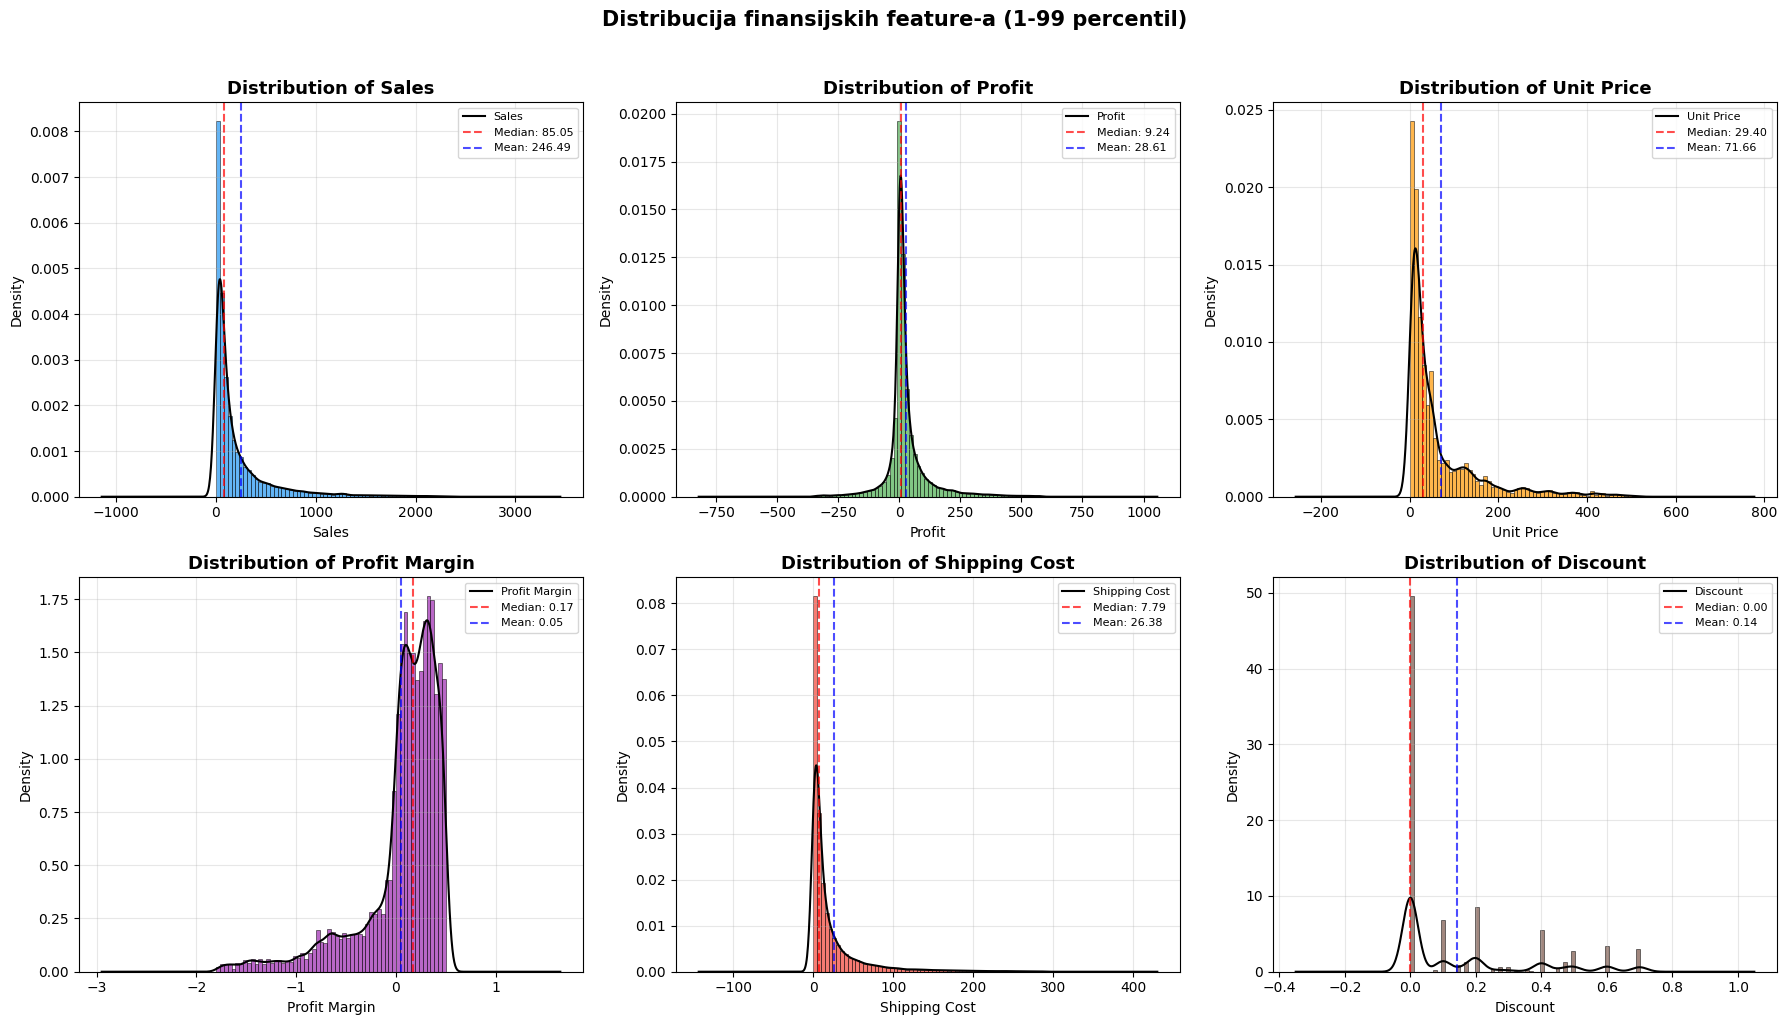

In [7]:
# Distribution plots for Sales, Profit, and Unit Price (log scale for skewed data)
from matplotlib import pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features = ['Sales', 'Profit', 'Unit Price', 'Profit Margin', 'Shipping Cost', 'Discount']
colors = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336', '#795548']

for idx, (feat, color) in enumerate(zip(features, colors)):
    row, col = idx // 3, idx % 3
    ax = axes[row][col]
    data = df_analysis[feat].dropna()
    
    # Remove extreme outliers for better visualization (keep 1st-99th percentile)
    q_low, q_high = data.quantile(0.01), data.quantile(0.99)
    data_trimmed = data[(data >= q_low) & (data <= q_high)]
    
    ax.hist(data_trimmed, bins=60, color=color, alpha=0.7, edgecolor='black', linewidth=0.5, density=True)
    data_trimmed.plot.kde(ax=ax, color='black', linewidth=1.5)
    ax.set_title(f'Distribution of {feat}', fontsize=13, fontweight='bold')
    ax.set_xlabel(feat)
    ax.set_ylabel('Density')
    ax.axvline(data.median(), color='red', linestyle='--', alpha=0.7, label=f'Median: {data.median():.2f}')
    ax.axvline(data.mean(), color='blue', linestyle='--', alpha=0.7, label=f'Mean: {data.mean():.2f}')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribucija finansijskih feature-a (1-99 percentil)', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

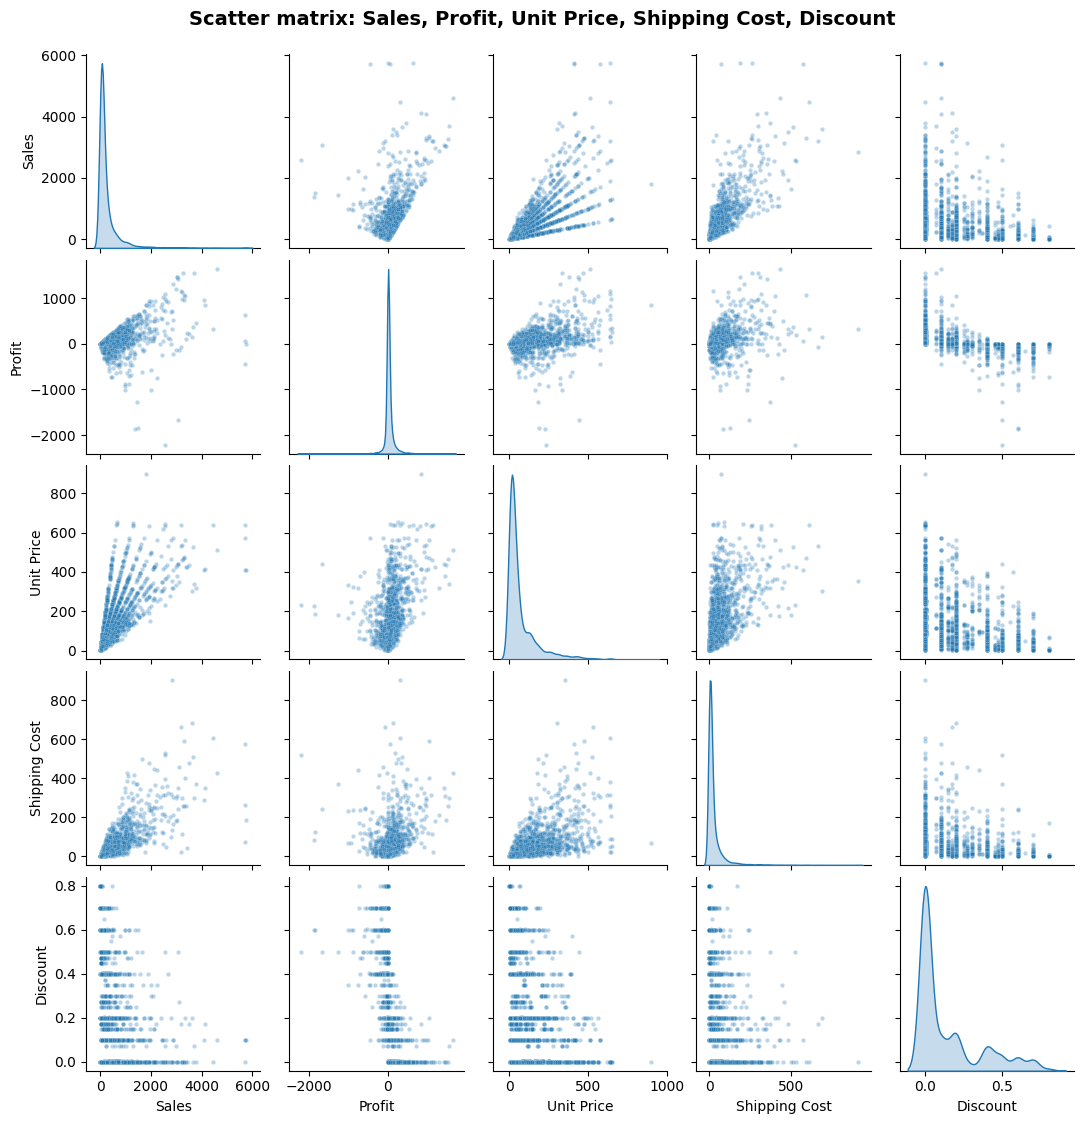

In [8]:
# Pairplot / Scatter matrix of key financial features
import seaborn as sns
import matplotlib.pyplot as plt

pair_cols = ['Sales', 'Profit', 'Unit Price', 'Shipping Cost', 'Discount']
sample = df_analysis[pair_cols].sample(n=min(5000, len(df_analysis)), random_state=42)

g = sns.pairplot(sample, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 10}, height=2.2)
g.figure.suptitle('Scatter matrix: Sales, Profit, Unit Price, Shipping Cost, Discount', y=1.02, fontsize=14, fontweight='bold')
plt.show()

C:\Users\jelen\AppData\Local\Temp\ipykernel_13104\3679209378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Bin', y='Profit', data=df_analysis, ax=axes[0], showfliers=False, palette='RdYlGn_r')
C:\Users\jelen\AppData\Local\Temp\ipykernel_13104\3679209378.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Bin', y='Profit Margin', data=df_analysis, ax=axes[1], showfliers=False, palette='RdYlGn_r')
C:\Users\jelen\AppData\Local\Temp\ipykernel_13104\3679209378.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

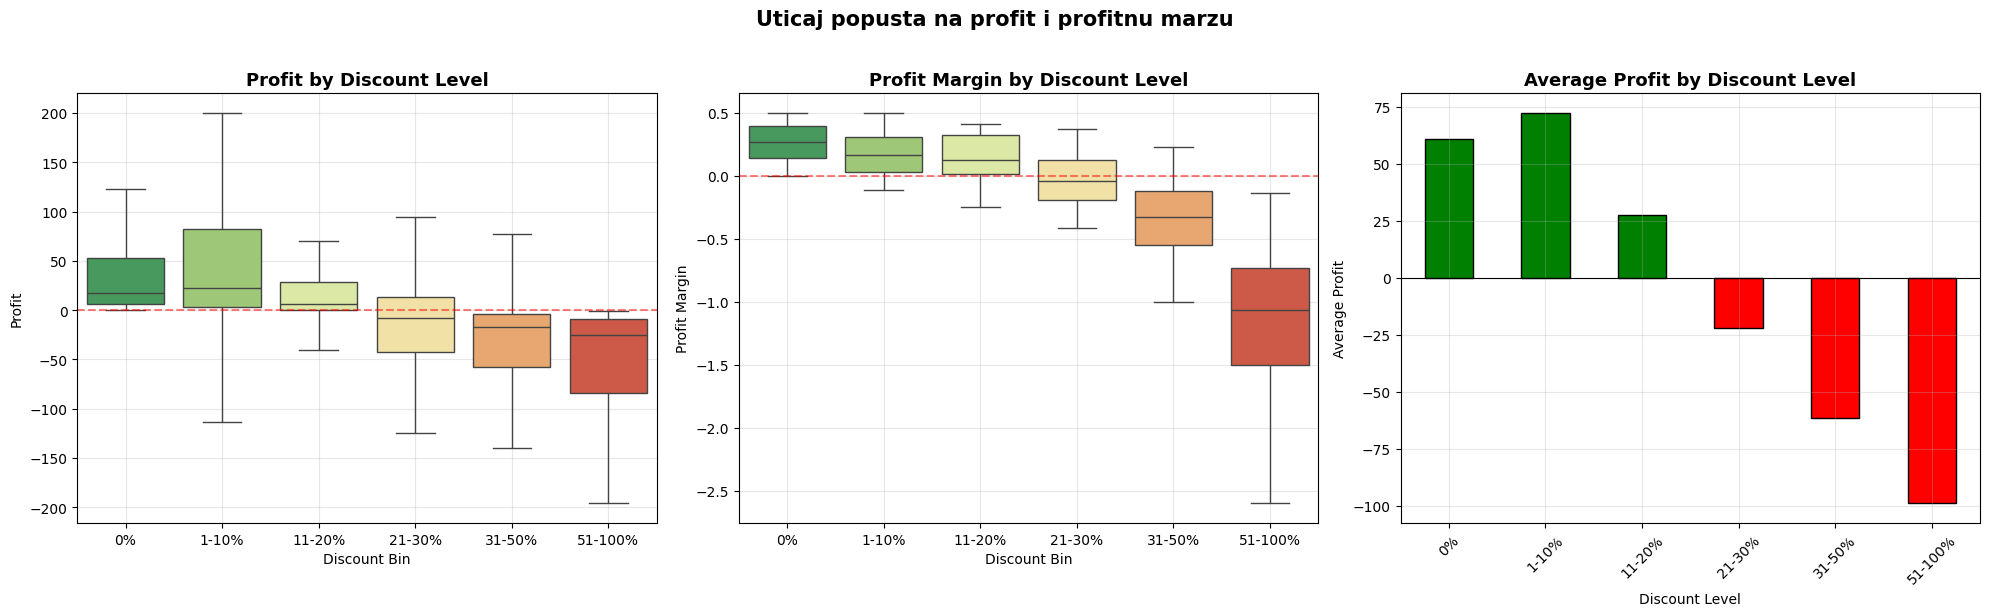

In [9]:
# Impact of Discount on Profit and Profit Margin
df_analysis['Discount Bin'] = pd.cut(df_analysis['Discount'], bins=[-0.01, 0, 0.1, 0.2, 0.3, 0.5, 1.0],
                                      labels=['0%', '1-10%', '11-20%', '21-30%', '31-50%', '51-100%'])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Boxplot: Profit by Discount Bin
sns.boxplot(x='Discount Bin', y='Profit', data=df_analysis, ax=axes[0], showfliers=False, palette='RdYlGn_r')
axes[0].set_title('Profit by Discount Level', fontsize=13, fontweight='bold')
axes[0].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[0].set_ylabel('Profit')
axes[0].grid(True, alpha=0.3)

# Boxplot: Profit Margin by Discount Bin
sns.boxplot(x='Discount Bin', y='Profit Margin', data=df_analysis, ax=axes[1], showfliers=False, palette='RdYlGn_r')
axes[1].set_title('Profit Margin by Discount Level', fontsize=13, fontweight='bold')
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].set_ylabel('Profit Margin')
axes[1].grid(True, alpha=0.3)

# Bar chart: Average Profit by Discount Bin
avg_profit = df_analysis.groupby('Discount Bin')['Profit'].mean()
colors = ['green' if v > 0 else 'red' for v in avg_profit.values]
avg_profit.plot(kind='bar', ax=axes[2], color=colors, edgecolor='black')
axes[2].set_title('Average Profit by Discount Level', fontsize=13, fontweight='bold')
axes[2].axhline(0, color='black', linestyle='-', linewidth=0.8)
axes[2].set_ylabel('Average Profit')
axes[2].set_xlabel('Discount Level')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.suptitle('Uticaj popusta na profit i profitnu marzu', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [10]:
# Drop customer name and product name columns
name_columns = ['Customer Name', 'Product Name']
df = df.drop(columns=name_columns)

print(f"Dropped columns: {name_columns}")
print(f"\nRemaining columns: {list(df.columns)}")

Dropped columns: ['Customer Name', 'Product Name']

Remaining columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Sales           51290 non-null  float64
 17  Quantity        51290 non-null 

In [12]:
# Analyze cardinality of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Cardinality Analysis for Categorical Columns:")
print("=" * 60)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col:20} | Unique values: {unique_count:5} | Sample: {df[col].iloc[0]}")

Cardinality Analysis for Categorical Columns:
Order ID             | Unique values: 25035 | Sample: CA-2012-124891
Order Date           | Unique values:  1430 | Sample: 31-07-2012
Ship Date            | Unique values:  1464 | Sample: 31-07-2012
Ship Mode            | Unique values:     4 | Sample: Same Day
Customer ID          | Unique values:  1590 | Sample: RH-19495
Segment              | Unique values:     3 | Sample: Consumer
City                 | Unique values:  3636 | Sample: New York City
State                | Unique values:  1094 | Sample: New York
Country              | Unique values:   147 | Sample: United States
Market               | Unique values:     7 | Sample: US
Region               | Unique values:    13 | Sample: East
Product ID           | Unique values: 10292 | Sample: TEC-AC-10003033
Category             | Unique values:     3 | Sample: Technology
Sub-Category         | Unique values:    17 | Sample: Accessories
Order Priority       | Unique values:     4 | Samp

In [13]:
id_columns = [col for col in df.columns if 'ID' in col.upper()]
df = df.drop(columns=id_columns)

date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col]) #.astype('int64') // 10**6

df['Lead_Time'] = (df['Ship Date'] - df['Order Date']).dt.days

print(f"Dropped columns: {id_columns}")


Dropped columns: ['Row ID', 'Order ID', 'Customer ID', 'Product ID']


C:\Users\jelen\AppData\Local\Temp\ipykernel_13104\2051795891.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col]) #.astype('int64') // 10**6
C:\Users\jelen\AppData\Local\Temp\ipykernel_13104\2051795891.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col]) #.astype('int64') // 10**6


In [14]:
# Analyze cardinality of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Cardinality Analysis for Categorical Columns:")
print("=" * 60)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col:20} | Unique values: {unique_count:5} | Sample: {df[col].iloc[0]}")

Cardinality Analysis for Categorical Columns:
Ship Mode            | Unique values:     4 | Sample: Same Day
Segment              | Unique values:     3 | Sample: Consumer
City                 | Unique values:  3636 | Sample: New York City
State                | Unique values:  1094 | Sample: New York
Country              | Unique values:   147 | Sample: United States
Market               | Unique values:     7 | Sample: US
Region               | Unique values:    13 | Sample: East
Category             | Unique values:     3 | Sample: Technology
Sub-Category         | Unique values:    17 | Sample: Accessories
Order Priority       | Unique values:     4 | Sample: Critical


In [15]:
#'City', 'Postal Code',
categorical_geo = [ 'State', 'Country', 'Region', 'Market']

for col in categorical_geo:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: State
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Caras-Severin            1
Pernik                   1
Edirne                   1
Kabarole                 1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64

Value counts for column: Country
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Bahrain             2
Swaziland           2
Burundi             2
Eritrea             2
Name: count, Length: 147, dtype: int64

Value counts for column: Region
Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       204

<Axes: xlabel='Market', ylabel='Count'>

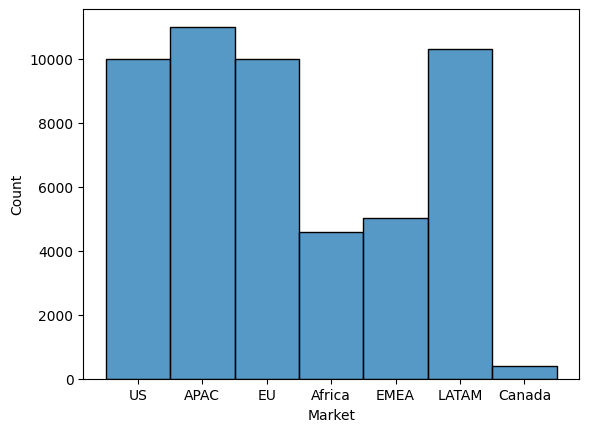

In [16]:
plt.figure()
sns.histplot(data=df, x='Market')

In [17]:
def merge_geo(row):
    # Spajanje Kanade sa US radi smanjenja outliera
    if row['Market'] == 'Canada' or row['Market'] == 'US':
        return 'North_America'
    
    # Za velike markete dodajemo regiju radi preciznosti
    if row['Market'] in ['APAC', 'LATAM', 'EU']:
        return f"{row['Market']}_{row['Region']}"
    
    # Za ostale (EMEA, Africa) ostavljamo samo Market
    return row['Market']

#df = df1.copy()
#df1 = df.copy()
#df['Unified_Market'] = df.apply(merge_geo, axis=1)

In [18]:
categorical_cols = ['State', 'Country', 'Region', 'Market']#, 'Unified_Market'

for col in categorical_cols:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: State
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Caras-Severin            1
Pernik                   1
Edirne                   1
Kabarole                 1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64

Value counts for column: Country
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Bahrain             2
Swaziland           2
Burundi             2
Eritrea             2
Name: count, Length: 147, dtype: int64

Value counts for column: Region
Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       204

In [19]:
# Drop high-cardinality columns not useful for clustering
high_cardinality_cols = ['City', 'Postal Code', 'State', 'Country',  'Region', 'Sub-Category']
#'Ship Date', 'Order Date', 'Region',  'Category', 'Sub-Category''Market',

df = df.drop(columns=high_cardinality_cols)

print(f"Dropped columns: {high_cardinality_cols}")
print(f"\nRemaining categorical columns:")
remaining_categorical = df.select_dtypes(include=['object']).columns.tolist()
print(remaining_categorical)

Dropped columns: ['City', 'Postal Code', 'State', 'Country', 'Region', 'Sub-Category']

Remaining categorical columns:
['Ship Mode', 'Segment', 'Market', 'Category', 'Order Priority']


<Axes: xlabel='Ship Mode', ylabel='Count'>

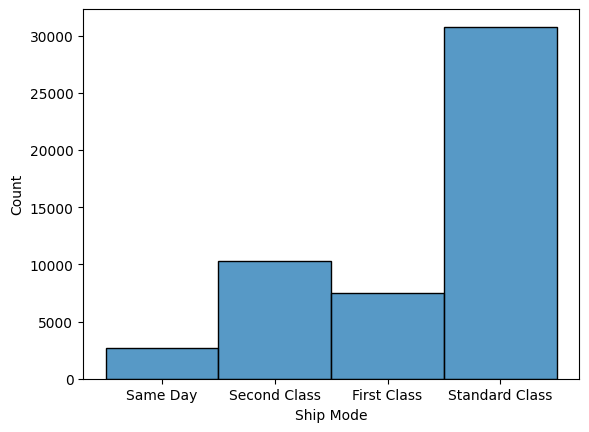

In [20]:
plt.figure()
sns.histplot(data=df, x='Ship Mode')

In [21]:
# Uporedi vrenosti u preostalim kategorijskim kolonama
for col in remaining_categorical:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: Ship Mode
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Value counts for column: Segment
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Value counts for column: Market
Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

Value counts for column: Category
Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

Value counts for column: Order Priority
Order Priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64


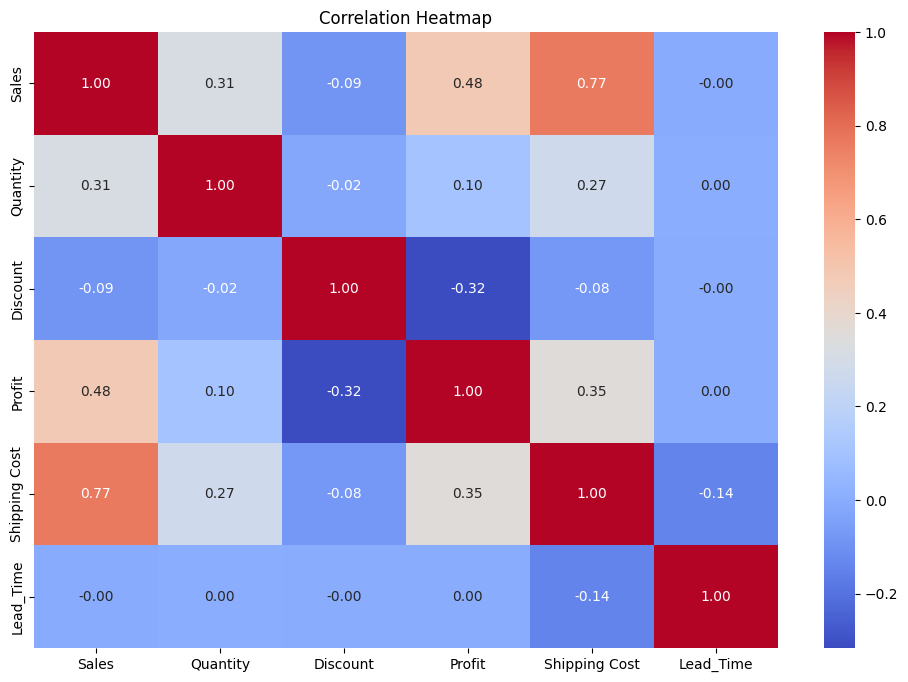

In [22]:
numeric_df = df.select_dtypes(include=[np.number, np.bool_])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Order Priority -> Ordinal (ima prirodni redosljed)
order_priority_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
df['Order Priority'] = df['Order Priority'].map(order_priority_map).astype('Int64')


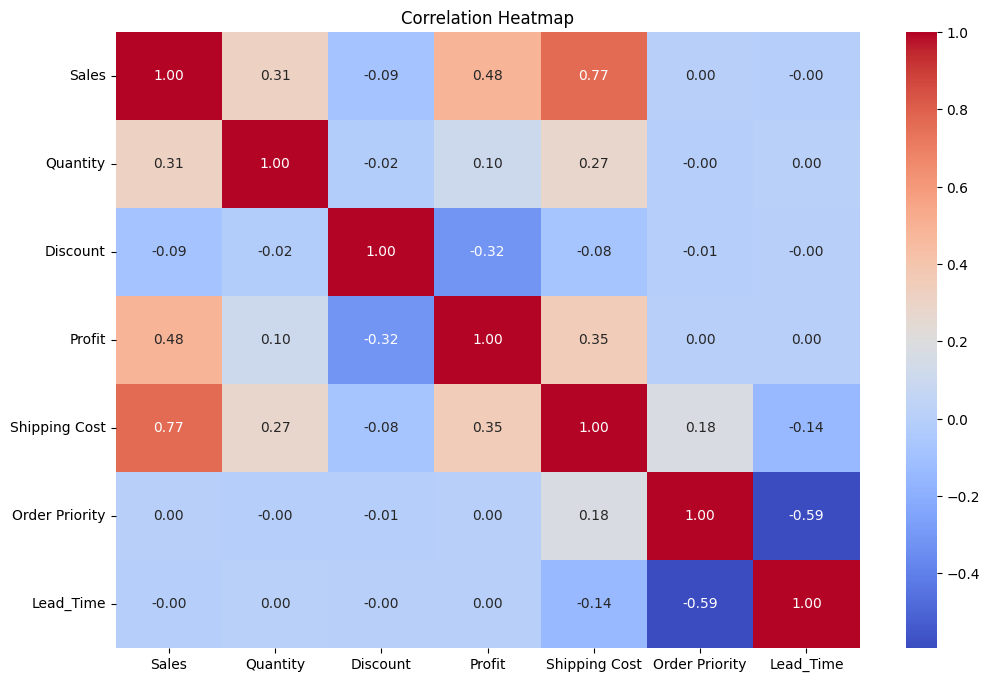

In [24]:
numeric_df = df.select_dtypes(include=[np.number, np.bool_])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:

remaining_categorical = df.select_dtypes(include=['object']).columns.tolist()
for col in remaining_categorical:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: Ship Mode
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Value counts for column: Segment
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Value counts for column: Market
Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

Value counts for column: Category
Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# Bucket Market into Continent, then one-hot encode categorical features


df_cluster = df.copy()

# Bucket Market into Continent
#continent_map = {
#    'US': 'North America',
#    'Canada': 'North America',
#    'LATAM': 'South America',
#    'EU': 'Europe',
#    'EMEA': 'Middle East',
#    'Africa': 'Africa',
#    'APAC': 'Asia Pacific'
#}
#df_cluster['Continent'] = df_cluster['Market'].map(continent_map)
df_cluster['Is_North_America'] = df_cluster['Market'].apply(lambda x: 1 if x in ['US', 'Canada'] else 0)


# One-hot encode: Continent, Ship Mode, Segment
ohe_cols = [ 'Ship Mode', 'Segment', 'Is_North_America', 'Category']#
df_ohe = pd.get_dummies(df_cluster[ohe_cols], drop_first=True)

# Drop the original columns + Market
df_cluster = df_cluster.drop(columns=ohe_cols + ['Market'])#

# Add the one-hot encoded columns
df_cluster = pd.concat([df_cluster, df_ohe], axis=1)

# Label encode remaining categorical columns (Category, Order Priority)
remaining_cat = df_cluster.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in remaining_cat:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col].astype(str))
    label_encoders[col] = le
    print(f"Label Encoded {col}: {le.classes_}")

print(f"\nOne-hot encoded: {ohe_cols}")
print(f"Label encoded: {remaining_cat}")
print(f"\nFinal columns ({len(df_cluster.columns)}):")
print(list(df_cluster.columns))
df_cluster.head()


One-hot encoded: ['Ship Mode', 'Segment', 'Is_North_America', 'Category']
Label encoded: []

Final columns (17):
['Order Date', 'Ship Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Lead_Time', 'Is_North_America', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office', 'Category_Office Supplies', 'Category_Technology']


Order Date  Ship Date     Sales  Quantity  Discount    Profit  \
0 2012-07-31 2012-07-31  2309.650         7       0.0  762.1845   
1 2013-02-05 2013-02-07  3709.395         9       0.1 -288.7650   
2 2013-10-17 2013-10-18  5175.171         9       0.1  919.9710   
3 2013-01-28 2013-01-30  2892.510         5       0.1  -96.5400   
4 2013-11-05 2013-11-06  2832.960         8       0.0  311.5200   

   Shipping Cost  Order Priority  Lead_Time  Is_North_America  \
0         933.57               3          0                 1   
1         923.63               3          2                 0   
2         915.49               1          1                 0   
3         910.16               1          2                 0   
4         903.04               3          1                 0   

   Ship Mode_Same Day  Ship Mode_Second Class  Ship Mode_Standard Class  \
0                True                   False                     False   
1               False                    True                     False   
2               False                   False                     False   
3               False                   False                     False   
4                True                   False                     False   

   Segment_Corporate  Segment_Home Office  Category_Office Supplies  \
0              False                False                     False   
1               True                False                     False   
2              False                False                     False   
3              False                 True                     False   
4              False                False                     False   

   Category_Technology  
0                 True  
1                False  
2                 True  
3                 True  
4                 True

In [28]:
# Grupisavanje retkih Sub-Category
#subcat_counts = df_cluster['Sub-Category'].value_counts()
#rare_subcats = subcat_counts[subcat_counts < 100].index  # Prilagodite limit
#
#df_cluster['Sub-Category_grouped'] = df_cluster['Sub-Category'].apply(
#    lambda x: x if x not in rare_subcats else 'Other'
#)
#
#print(f"Originalno Sub-Category: {df_cluster['Sub-Category'].nunique()} vrednosti")
#print(f"Grupisano Sub-Category: {df_cluster['Sub-Category_grouped'].nunique()} vrednosti")
#
##df_cluster = df_cluster[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 
##                         'Category', 'Sub-Category_grouped']].copy()
#
## Pripremi za klasteriranje
#df_encoded = pd.get_dummies(df_cluster, 
#                             columns=['Sub-Category_grouped'], 
#                             drop_first=True)
#
#ohe_cols = [ 'Sub-Category_grouped', 'Category' ]#
#df_ohe = pd.get_dummies(df_cluster[ohe_cols], drop_first=True)
#
#df_cluster = df_cluster.drop(columns=['Sub-Category','Sub-Category_grouped', 'Category' ])#
#
#df_cluster = pd.concat([df_cluster, df_ohe], axis=1)
#
#print(list(df_cluster.columns))
df_cluster.head()

Order Date  Ship Date     Sales  Quantity  Discount    Profit  \
0 2012-07-31 2012-07-31  2309.650         7       0.0  762.1845   
1 2013-02-05 2013-02-07  3709.395         9       0.1 -288.7650   
2 2013-10-17 2013-10-18  5175.171         9       0.1  919.9710   
3 2013-01-28 2013-01-30  2892.510         5       0.1  -96.5400   
4 2013-11-05 2013-11-06  2832.960         8       0.0  311.5200   

   Shipping Cost  Order Priority  Lead_Time  Is_North_America  \
0         933.57               3          0                 1   
1         923.63               3          2                 0   
2         915.49               1          1                 0   
3         910.16               1          2                 0   
4         903.04               3          1                 0   

   Ship Mode_Same Day  Ship Mode_Second Class  Ship Mode_Standard Class  \
0                True                   False                     False   
1               False                    True                     False   
2               False                   False                     False   
3               False                   False                     False   
4                True                   False                     False   

   Segment_Corporate  Segment_Home Office  Category_Office Supplies  \
0              False                False                     False   
1               True                False                     False   
2              False                False                     False   
3              False                 True                     False   
4              False                False                     False   

   Category_Technology  
0                 True  
1                False  
2                 True  
3                 True  
4                 True

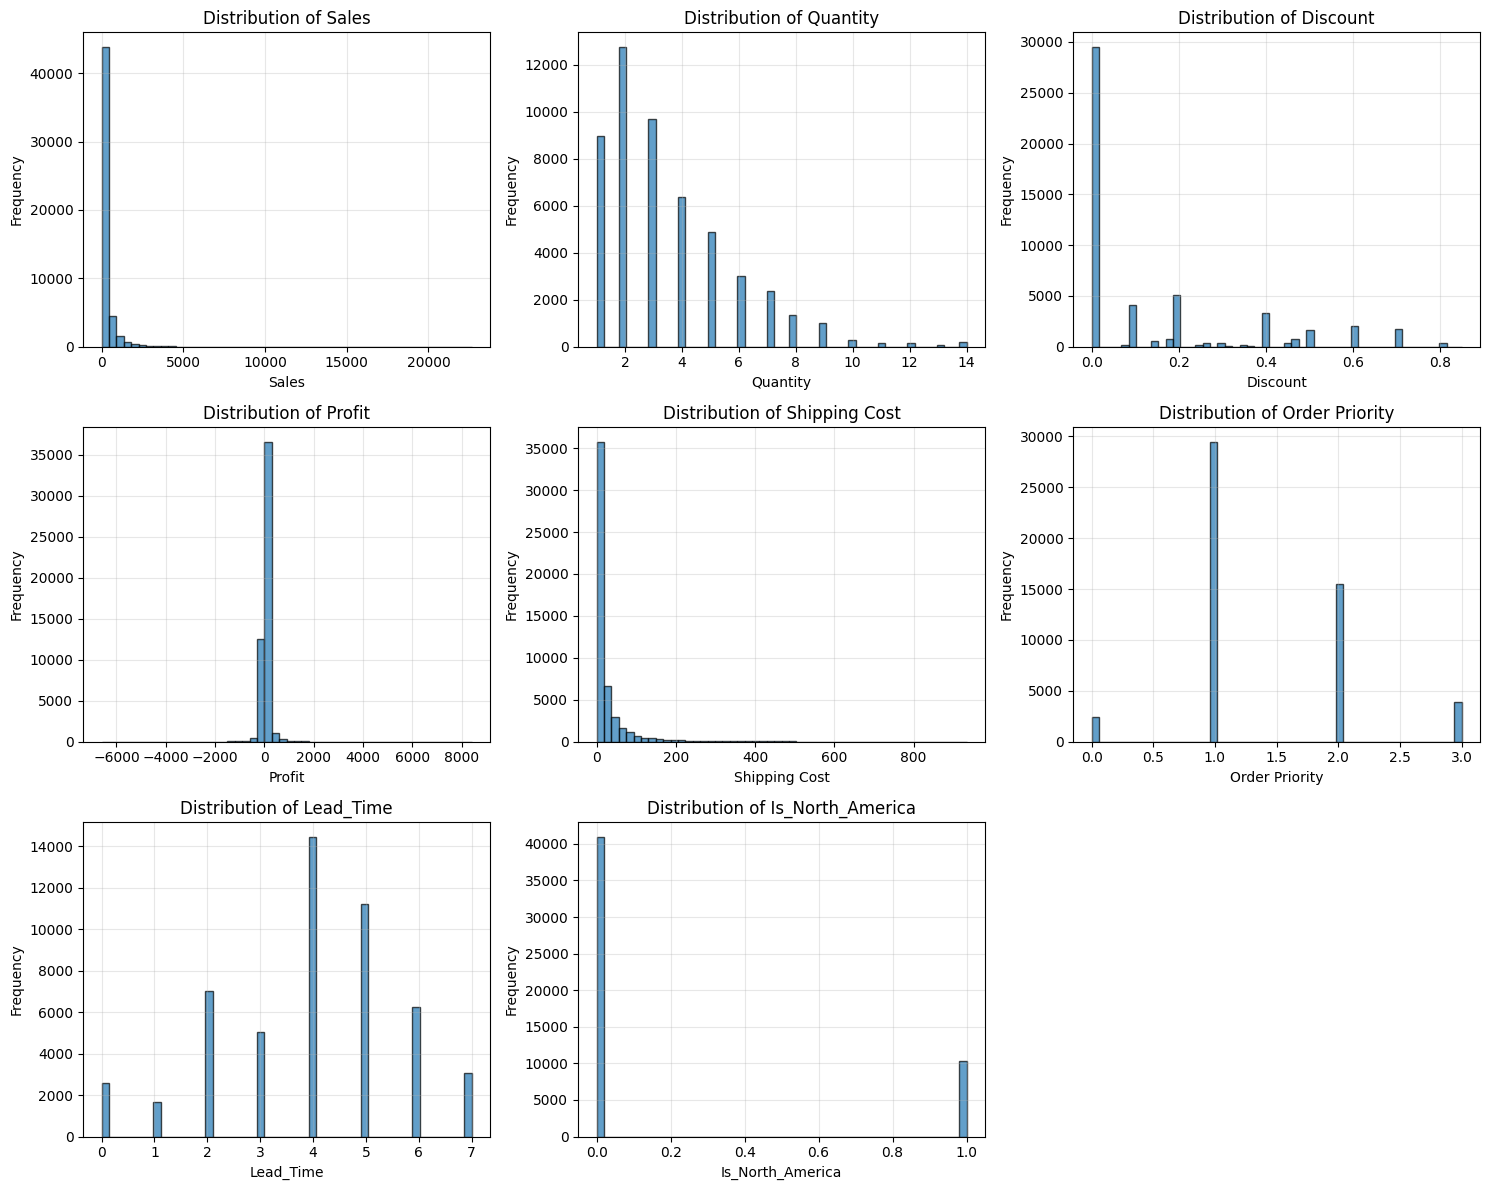

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_cluster.select_dtypes(include=[np.number]).columns.tolist()

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df_cluster[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [30]:
def outliers_iqr(x: pd.Series):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0]

def outliers_z_score(ys: pd.Series):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

def outliers_modified_z_score(ys: pd.Series):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    
    if median_absolute_deviation_y == 0:
        median_absolute_deviation_y = np.finfo(np.double).min
    
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)[0]


outliers = {}
print("Outliers:",' ' * 26,"IQR ZScore ModZScore")
numerical_features = df_cluster.select_dtypes(include=[np.number, np.bool_]).columns.tolist()
# Convert boolean columns to integers for outlier detection
df_cluster_bool = df_cluster.copy()
bool_cols = df_cluster_bool.select_dtypes(include=[np.bool_]).columns
for col in bool_cols:
    df_cluster_bool[col] = df_cluster_bool[col].astype(int)

for col in numerical_features:
    outliersIQR = outliers_iqr(df_cluster_bool[col])
    outliersZScore = outliers_z_score(df_cluster_bool[col])
    outliersModZScore = outliers_modified_z_score(df_cluster_bool[col])
    outliers[col] = (outliersIQR, outliersZScore, outliersModZScore)
    print(f"Column '{col:24}': {len(outliersIQR):5} {len(outliersZScore):6} {len(outliersModZScore):9}")

Outliers:                            IQR ZScore ModZScore
Column 'Sales                   ':  5655   1020      7829
Column 'Quantity                ':   877    601      1864
Column 'Discount                ':  4172    318         0
Column 'Profit                  ':  9755    865      9109
Column 'Shipping Cost           ':  5909   1041      8237
Column 'Order Priority          ':     0      0         0
Column 'Lead_Time               ':     0      0         0
Column 'Is_North_America        ': 10378      0         0
Column 'Ship Mode_Same Day      ':  2701   2701         0
Column 'Ship Mode_Second Class  ': 10309      0         0
Column 'Ship Mode_Standard Class':     0      0         0
Column 'Segment_Corporate       ':     0      0         0
Column 'Segment_Home Office     ':  9343      0         0
Column 'Category_Office Supplies':     0      0         0
Column 'Category_Technology     ': 10141      0         0


In [31]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Ensure required columns exist
if 'Unit_Price' not in df_cluster.columns:
    df_cluster['Unit_Price'] = df_cluster['Sales'] / df_cluster['Quantity']

# Lead time from datetime or numeric dates
if 'Lead_Time' not in df_cluster.columns and {'Order Date', 'Ship Date'}.issubset(df_cluster.columns):
    if pd.api.types.is_datetime64_any_dtype(df_cluster['Order Date']) and pd.api.types.is_datetime64_any_dtype(df_cluster['Ship Date']):
        df_cluster['Lead_Time'] = (df_cluster['Ship Date'] - df_cluster['Order Date']).dt.days
    else:
        # Assume numeric epoch milliseconds
        df_cluster['Lead_Time'] = ((df_cluster['Ship Date'] - df_cluster['Order Date']) / (1000 * 60 * 60 * 24)).round().astype('Int64')

# Remove Order Date and Ship Date columns (already used to create Lead_Time)
df_cluster = df_cluster.drop(columns=['Order Date', 'Ship Date'], errors='ignore')

# Convert boolean columns to numeric
bool_cols = df_cluster.select_dtypes(include=['bool']).columns
for col in bool_cols:
    df_cluster[col] = df_cluster[col].astype(int)

# Select only numeric columns for clustering (remove categorical/object types)
df_cluster_numeric = df_cluster.select_dtypes(include=[np.number]).copy()

print(f"Original df_cluster shape: {df_cluster.shape}")
print(f"Numeric only shape: {df_cluster_numeric.shape}")
print(f"Columns removed: {set(df_cluster.columns) - set(df_cluster_numeric.columns)}")

# 1. Define column groups for optimal scaling
robust_cols = ['Sales', 'Shipping Cost']  # Robust to outliers
standard_cols = ['Profit', 'Unit_Price']  # Z-score normalization
minmax_cols = ['Discount', 'Lead_Time']  # Scale to [0,1]

# Keep only columns that exist in the numeric dataframe
existing_cols = set(df_cluster_numeric.columns)
robust_cols = [col for col in robust_cols if col in existing_cols]
standard_cols = [col for col in standard_cols if col in existing_cols]
minmax_cols = [col for col in minmax_cols if col in existing_cols]

print("\nRobust cols:", robust_cols)
print("Standard cols:", standard_cols)
print("MinMax cols:", minmax_cols)

# Get remaining numeric columns (not in any scaler group)
all_scaling_cols = set(robust_cols + standard_cols + minmax_cols)
remaining_cols = list(existing_cols - all_scaling_cols)
print("Remaining cols (will use passthrough):", remaining_cols)

# 2. Create transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('rob', RobustScaler(), robust_cols),
        ('std', StandardScaler(), standard_cols),
        ('mm', MinMaxScaler(), minmax_cols)
    ],
    remainder='passthrough',  # Now safe - only numeric columns remain
    verbose_feature_names_out=False
)

# 3. Apply and create scaled dataset
X_scaled = preprocessor.fit_transform(df_cluster_numeric)
df_cluster_1 = pd.DataFrame(X_scaled, columns=preprocessor.get_feature_names_out())

print(f"\nInitial scaled data shape: {X_scaled.shape}")
print(f"Number of samples: {X_scaled.shape[0]}")
print(f"Number of features: {X_scaled.shape[1]}")
print(f"\nData types in df_cluster_1:")
print(df_cluster_1.dtypes.value_counts())

# 4. Remove any rows with NaN values from scaled data
df_cluster_clean = df_cluster_1.apply(pd.to_numeric, errors='coerce')
#df_cluster_clean = df_cluster_1.select_dtypes(include=[np.number]).dropna()

# Ensure all columns are float64 for clustering
df_cluster_clean = df_cluster_clean.astype(np.float64)
X_scaled = df_cluster_clean.values

print(f"\nFinal shape after NaN removal: {X_scaled.shape}")
print(f"Number of features: {X_scaled.shape[1]}")
print(f"Number of samples: {X_scaled.shape[0]}")
print(f"X_scaled dtype: {X_scaled.dtype}")

Original df_cluster shape: (51290, 16)
Numeric only shape: (51290, 16)
Columns removed: set()

Robust cols: ['Sales', 'Shipping Cost']
Standard cols: ['Profit', 'Unit_Price']
MinMax cols: ['Discount', 'Lead_Time']
Remaining cols (will use passthrough): ['Category_Technology', 'Order Priority', 'Ship Mode_Same Day', 'Ship Mode_Standard Class', 'Segment_Home Office', 'Is_North_America', 'Category_Office Supplies', 'Quantity', 'Ship Mode_Second Class', 'Segment_Corporate']

Initial scaled data shape: (51290, 16)
Number of samples: 51290
Number of features: 16

Data types in df_cluster_1:
object    16
Name: count, dtype: int64

Final shape after NaN removal: (51290, 16)
Number of features: 16
Number of samples: 51290
X_scaled dtype: float64


In [32]:
df_cluster_1.head()

Sales Shipping Cost    Profit Unit_Price  Discount Lead_Time Quantity  \
0  10.098283     42.389194  4.207735   2.274094       0.0       0.0        7   
1  16.452253     41.934066  -1.82045   2.997854  0.117647  0.285714        9   
2  23.105962     41.561355   5.11279   4.431764  0.117647  0.142857        9   
3  12.744104     41.317308 -0.717859   4.462429  0.117647  0.285714        5   
4  12.473784       40.9913   1.62275   2.486895       0.0  0.142857        8   

  Order Priority Is_North_America Ship Mode_Same Day Ship Mode_Second Class  \
0              3                1                  1                      0   
1              3                0                  0                      1   
2              1                0                  0                      0   
3              1                0                  0                      0   
4              3                0                  1                      0   

  Ship Mode_Standard Class Segment_Corporate Segment_Home Office  \
0                        0                 0                   0   
1                        0                 1                   0   
2                        0                 0                   0   
3                        0                 0                   1   
4                        0                 0                   0   

  Category_Office Supplies Category_Technology  
0                        0                   1  
1                        0                   0  
2                        0                   1  
3                        0                   1  
4                        0                   1

In [33]:
df_cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sales                     51290 non-null  object
 1   Shipping Cost             51290 non-null  object
 2   Profit                    51290 non-null  object
 3   Unit_Price                51290 non-null  object
 4   Discount                  51290 non-null  object
 5   Lead_Time                 51290 non-null  object
 6   Quantity                  51290 non-null  object
 7   Order Priority            51290 non-null  object
 8   Is_North_America          51290 non-null  object
 9   Ship Mode_Same Day        51290 non-null  object
 10  Ship Mode_Second Class    51290 non-null  object
 11  Ship Mode_Standard Class  51290 non-null  object
 12  Segment_Corporate         51290 non-null  object
 13  Segment_Home Office       51290 non-null  object
 14  Category_Office Suppli

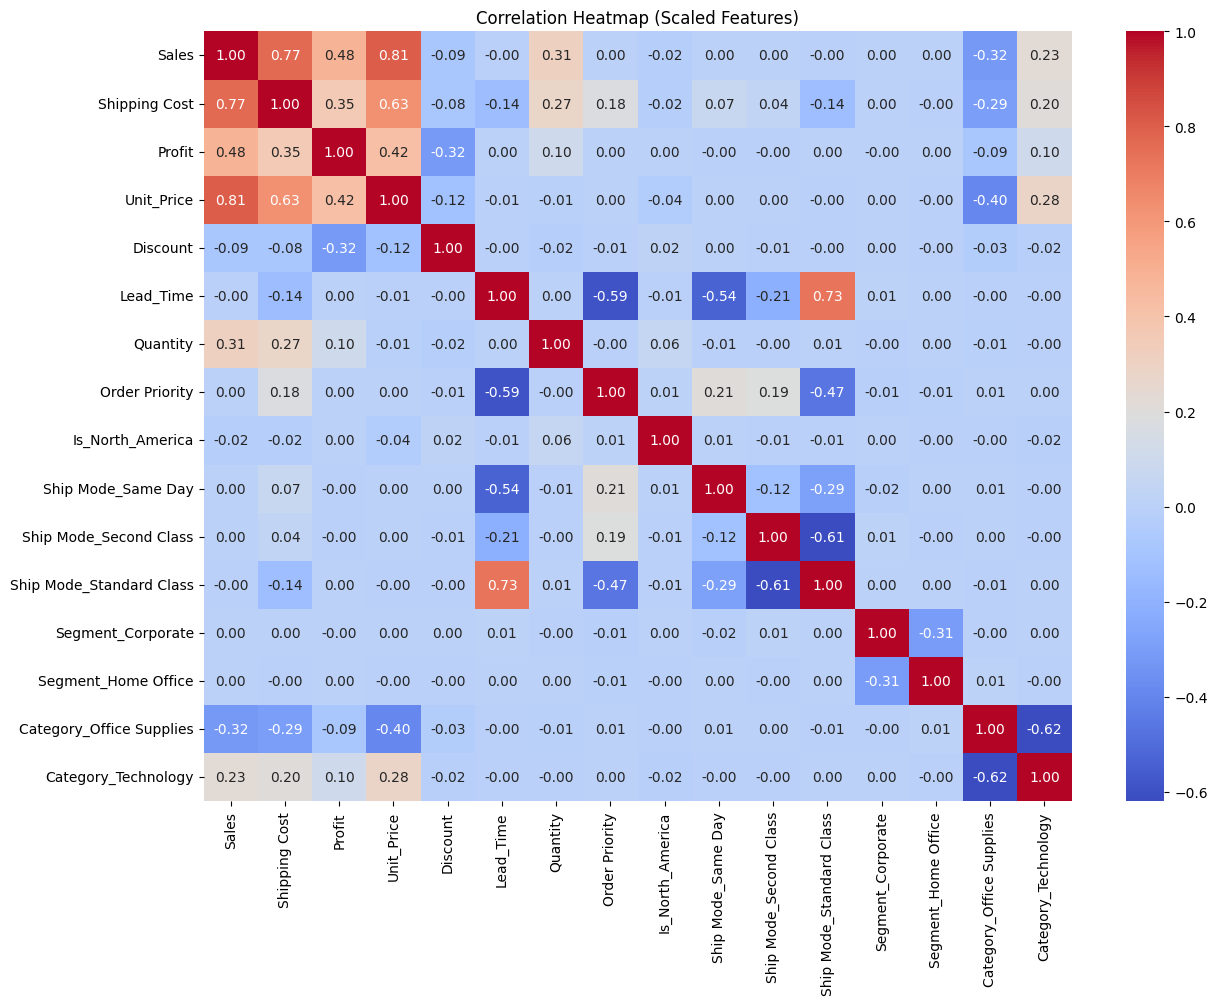

In [34]:
# 1. Uzmi samo numeričke kolone i obezbedi da su stvarno brojevi
numeric_data = df_cluster_clean.select_dtypes(include=[np.number])

# 2. Ako je select_dtypes zakazao, prisilno konvertuj (čest problem sa CSV importom)
if numeric_data.empty:
    numeric_data = df_cluster_clean.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# 3. Tek sada radi korelaciju
correlation = numeric_data.corr()

# 4. Provera pre crtanja
if not correlation.empty and correlation.shape[0] > 0:
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap (Scaled Features)')
    plt.show()
else:
    print("Greška: Matrica korelacije je prazna. Proveri da li su kolone u df_cluster_clean tipa float ili int.")


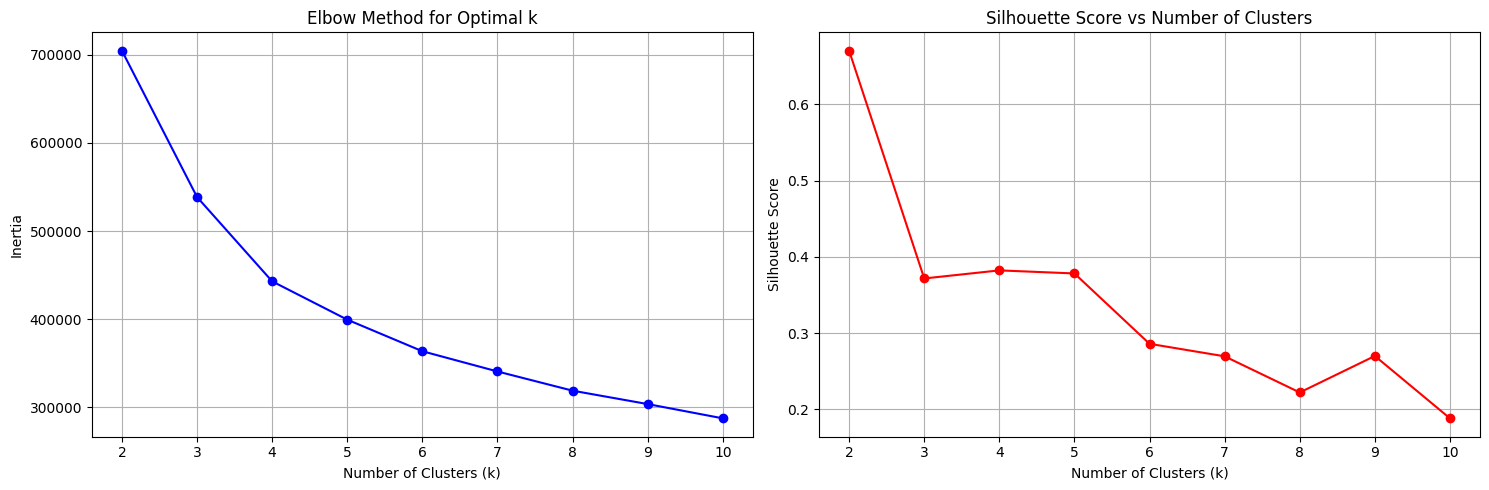

In [35]:
# K-Means: Find optimal k using elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [36]:
# Apply K-Means with optimal k
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster_clean['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

print(f"K-Means Clustering with k={optimal_k}")
print("\nCluster distribution:")
print(df_cluster_clean['KMeans_Cluster'].value_counts().sort_index())

K-Means Clustering with k=4

Cluster distribution:
KMeans_Cluster
0     4414
1    35253
2      698
3    10925
Name: count, dtype: int64


In [37]:
cluster_col = 'KMeans_Cluster'
profile = df_cluster_clean.groupby(cluster_col)[
    ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Unit_Price']
].mean()
print(profile.round(2))

                Sales  Quantity  Discount  Profit  Shipping Cost  Unit_Price
KMeans_Cluster                                                              
0                4.38      4.64      0.12    0.63           4.86        1.69
1                0.11      2.31      0.17   -0.11           0.14       -0.17
2               12.23      6.60      0.09    2.98          16.77        3.52
3                0.53      6.58      0.17   -0.08           0.50       -0.36


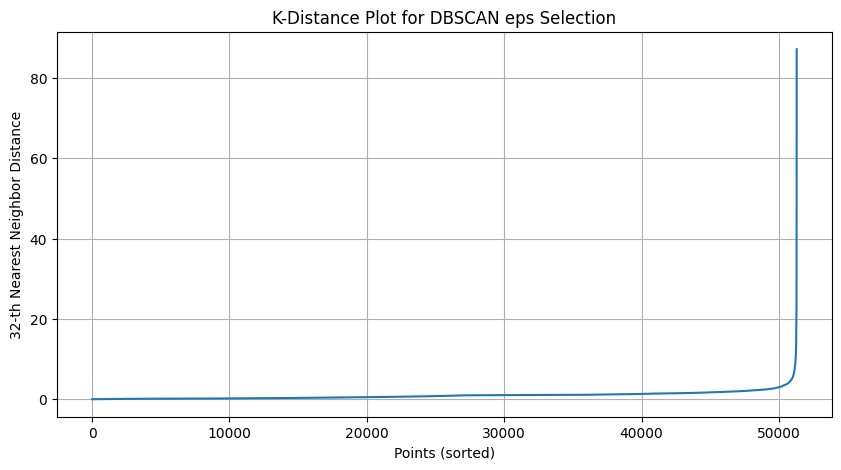

Selected eps: 2.8148, min_samples: 32

DBSCAN Clustering (eps=2.8148, min_samples=32)

Cluster distribution:
DBSCAN_Cluster
-1      948
 0    50342
Name: count, dtype: int64

Number of noise points (label=-1): 948
Number of clusters found: 1


In [38]:
# Apply DBSCAN - use k-distance plot to find optimal eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Rule of thumb: min_samples = 2 * n_features
min_samples = 2 * X_scaled.shape[1]

# Compute k-nearest neighbor distances to find eps
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, _ = nn.kneighbors(X_scaled)
k_distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.xlabel('Points (sorted)')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('K-Distance Plot for DBSCAN eps Selection')
plt.grid(True)
plt.show()

# Use the elbow/knee of the curve as eps
# A good heuristic: find where the rate of change increases sharply
eps_value = np.percentile(k_distances, 97)
print(f"Selected eps: {eps_value:.4f}, min_samples: {min_samples}")

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
df_cluster_clean['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(f"\nDBSCAN Clustering (eps={eps_value:.4f}, min_samples={min_samples})")
print("\nCluster distribution:")
print(df_cluster_clean['DBSCAN_Cluster'].value_counts().sort_index())
print(f"\nNumber of noise points (label=-1): {(df_cluster_clean['DBSCAN_Cluster'] == -1).sum()}")
print(f"Number of clusters found: {len(set(df_cluster_clean['DBSCAN_Cluster'])) - (1 if -1 in df_cluster_clean['DBSCAN_Cluster'].values else 0)}")

In [39]:
# Podesi DBSCAN da dobije ~7 klastera (heuristika preko eps percentila)
#from sklearn.cluster import DBSCAN
#import numpy as np
#
#target_clusters = 7 
#percentile_grid = np.linspace(90, 99.5, 20)
#
#candidates = []
#for p in percentile_grid:
#    eps_try = np.percentile(k_distances, p)
#    labels_try = DBSCAN(eps=eps_try, min_samples=min_samples).fit_predict(X_scaled)
#    n_clusters_try = len(set(labels_try)) - (1 if -1 in labels_try else 0)
#    noise_ratio = (labels_try == -1).mean()
#    candidates.append((p, eps_try, n_clusters_try, noise_ratio))
#
## Izaberi eps koji daje broj klastera najblizi targetu (pa najmanje noise)
#candidates_sorted = sorted(candidates, key=lambda x: (abs(x[2] - target_clusters), x[3]))
#best_p, best_eps, best_n_clusters, best_noise = candidates_sorted[0]
#
#print("Najbolji kandidat:")
#print(f"  percentile={best_p:.1f} | eps={best_eps:.4f} | clusters={best_n_clusters} | noise={best_noise:.2%}")
#
#dbscan_tuned = DBSCAN(eps=best_eps, min_samples=min_samples)
#df_cluster_clean['DBSCAN_Cluster'] = dbscan_tuned.fit_predict(X_scaled)
#
#print("\nDBSCAN (tuned) cluster distribution:")
#print(df_cluster_clean['DBSCAN_Cluster'].value_counts().sort_index())
#print(f"Number of clusters found: {len(set(df_cluster_clean['DBSCAN_Cluster'])) - (1 if -1 in df_cluster_clean['DBSCAN_Cluster'].values else 0)}")

In [40]:
# Apply Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df_cluster_clean['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

print(f"Hierarchical Clustering with {n_clusters} clusters")
print("\nCluster distribution:")
print(df_cluster_clean['Hierarchical_Cluster'].value_counts().sort_index())

Hierarchical Clustering with 4 clusters

Cluster distribution:
Hierarchical_Cluster
0     7679
1      907
2    31111
3    11593
Name: count, dtype: int64


In [41]:
# Compare clustering algorithms
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

results = []

# K-Means metrics
kmeans_silhouette = silhouette_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
kmeans_calinski = calinski_harabasz_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
kmeans_davies = davies_bouldin_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
results.append(['K-Means', kmeans_silhouette, kmeans_calinski, kmeans_davies])

# DBSCAN metrics (excluding noise)
dbscan_mask = df_cluster_clean['DBSCAN_Cluster'] != -1
n_dbscan_clusters = df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'].nunique()

if dbscan_mask.sum() > 0 and n_dbscan_clusters >= 2:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    dbscan_calinski = calinski_harabasz_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    dbscan_davies = davies_bouldin_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    results.append(['DBSCAN', dbscan_silhouette, dbscan_calinski, dbscan_davies])
else:
    print(f"\nWarning: DBSCAN found only {n_dbscan_clusters} cluster(s). Skipping metrics calculation.")
    results.append(['DBSCAN', None, None, None])

# Hierarchical metrics
hier_silhouette = silhouette_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
hier_calinski = calinski_harabasz_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
hier_davies = davies_bouldin_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
results.append(['Hierarchical', hier_silhouette, hier_calinski, hier_davies])

comparison_df = pd.DataFrame(results, columns=['Algorithm', 'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])
print("CLUSTERING ALGORITHM COMPARISON")
print("="*80)
print("\n" + "="*80)
print(comparison_df.to_string(index=False))


CLUSTERING ALGORITHM COMPARISON

   Algorithm  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
     K-Means          0.382249       24382.190058        1.025548
      DBSCAN               NaN                NaN             NaN
Hierarchical          0.312424       21058.904379        1.169396


# Dimensionality Reduction: PCA Analysis

Analiza glavnih komponenti (PCA) - redukcija dimenzionalnosti sa čuvanjem maksimalne varijanse.

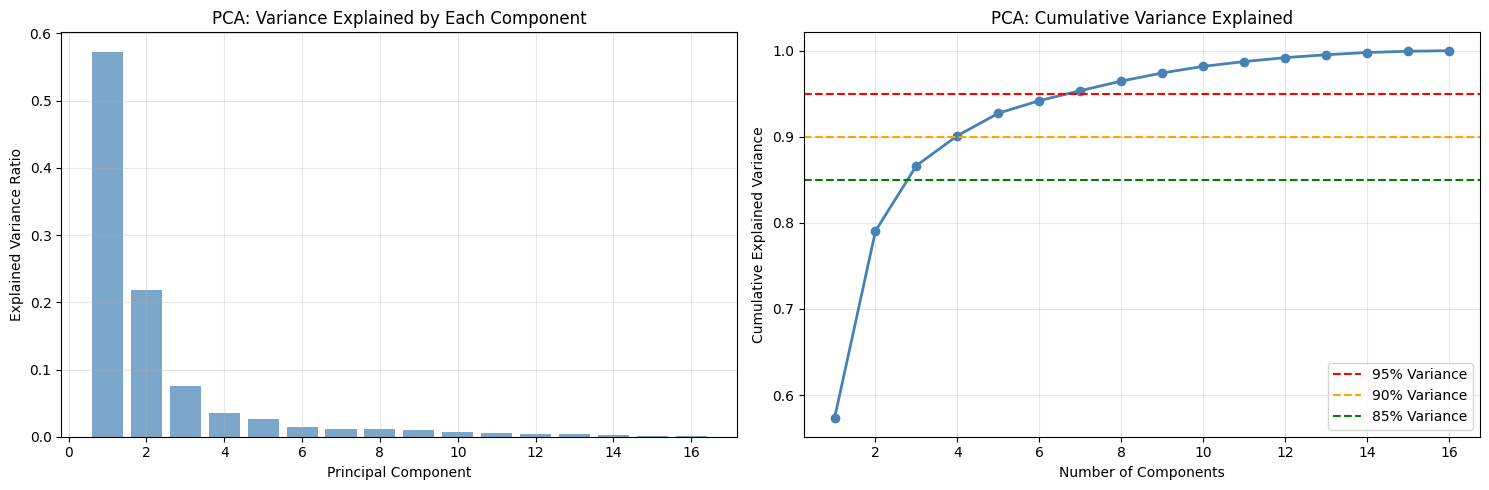


Optimal number of components for 95% variance: 7
Cumulative variance with 7 components: 0.9536

Total features: 16
Dimensionality reduction: 16 → 7 (56.2%)


In [62]:
# PCA - Find optimal number of components
from sklearn.decomposition import PCA

# Fit PCA with all components to analyze variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot variance explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Individual variance
ax1.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_, alpha=0.7, color='steelblue')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('PCA: Variance Explained by Each Component')
ax1.grid(True, alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', linewidth=2, color='steelblue')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax2.axhline(y=0.85, color='green', linestyle='--', label='85% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('PCA: Cumulative Variance Explained')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal components (e.g., 95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nOptimal number of components for 95% variance: {optimal_components}")
print(f"Cumulative variance with {optimal_components} components: {cumulative_variance[optimal_components-1]:.4f}")
print(f"\nTotal features: {X_scaled.shape[1]}")
print(f"Dimensionality reduction: {X_scaled.shape[1]} → {optimal_components} ({100*(1-optimal_components/X_scaled.shape[1]):.1f}%)")

PCA 2D - Explained variance: 0.7906
PCA 3D - Explained variance: 0.8667


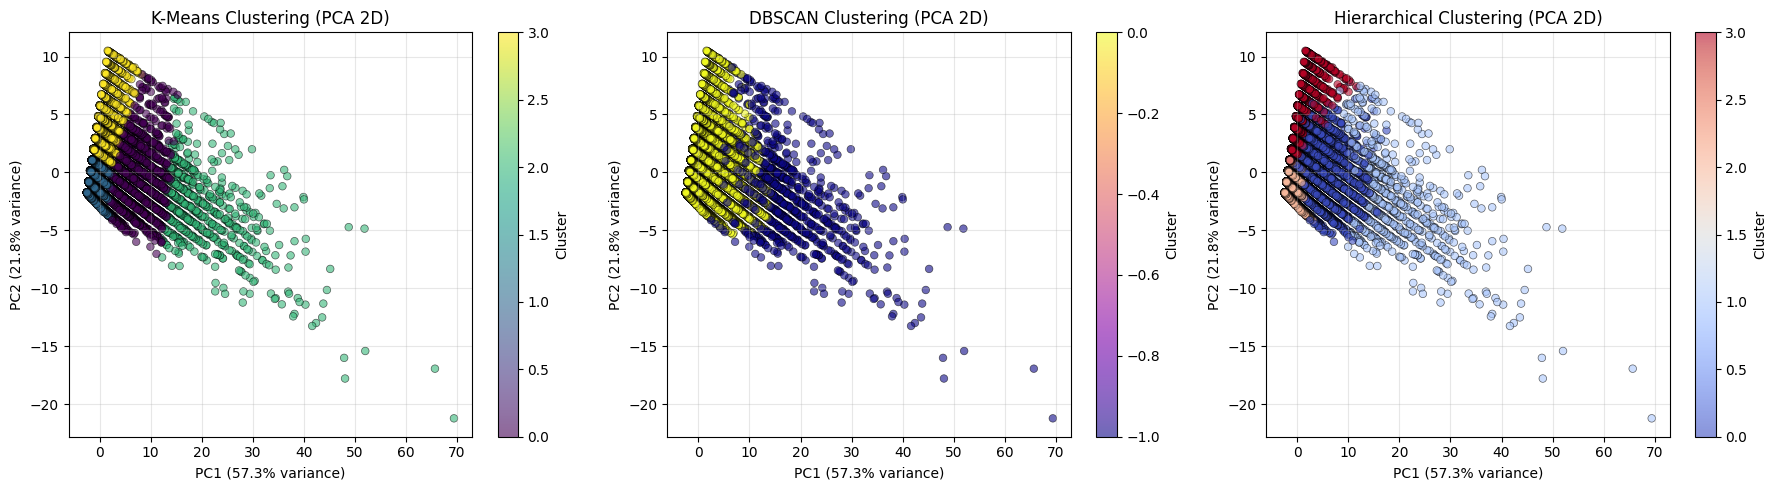

In [63]:
# Apply PCA with 2 and 3 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"PCA 2D - Explained variance: {pca_2d.explained_variance_ratio_.sum():.4f}")
print(f"PCA 3D - Explained variance: {pca_3d.explained_variance_ratio_.sum():.4f}")

# 2D visualization with K-Means clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
sc1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                       c=df_cluster_clean['KMeans_Cluster'], cmap='viridis', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('K-Means Clustering (PCA 2D)')
plt.colorbar(sc1, ax=axes[0], label='Cluster')
axes[0].grid(True, alpha=0.3)

# DBSCAN
dbscan_labels = df_cluster_clean['DBSCAN_Cluster'].values
sc2 = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                       c=dbscan_labels, cmap='plasma', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
axes[1].set_title('DBSCAN Clustering (PCA 2D)')
plt.colorbar(sc2, ax=axes[1], label='Cluster')
axes[1].grid(True, alpha=0.3)

# Hierarchical
sc3 = axes[2].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                       c=df_cluster_clean['Hierarchical_Cluster'], cmap='coolwarm', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[2].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
axes[2].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
axes[2].set_title('Hierarchical Clustering (PCA 2D)')
plt.colorbar(sc3, ax=axes[2], label='Cluster')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

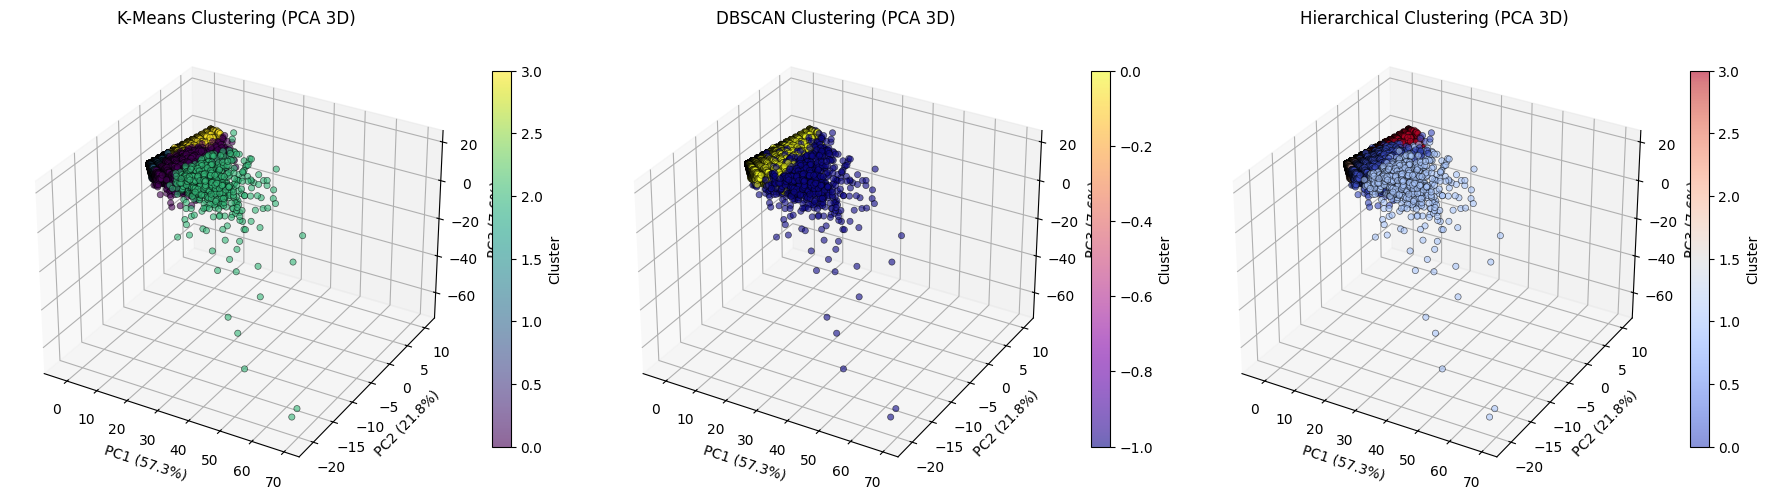

In [64]:
# 3D Visualization of PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))

# K-Means 3D
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=df_cluster_clean['KMeans_Cluster'], cmap='viridis', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=20)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax1.set_title('K-Means Clustering (PCA 3D)')
plt.colorbar(scatter1, ax=ax1, label='Cluster', shrink=0.8)

# DBSCAN 3D
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=dbscan_labels, cmap='plasma', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=20)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax2.set_title('DBSCAN Clustering (PCA 3D)')
plt.colorbar(scatter2, ax=ax2, label='Cluster', shrink=0.8)

# Hierarchical 3D
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=df_cluster_clean['Hierarchical_Cluster'], cmap='coolwarm', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=20)
ax3.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax3.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax3.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax3.set_title('Hierarchical Clustering (PCA 3D)')
plt.colorbar(scatter3, ax=ax3, label='Cluster', shrink=0.8)

plt.tight_layout()
plt.show()

# Dimensionality Reduction: t-SNE Analysis

t-SNE (t-Distributed Stochastic Neighbor Embedding) - nelinearna redukcija dimenzionalnosti koja čuva lokalnu strukturu podataka.

Computing t-SNE... (this may take a minute)
Dataset shape: (51290, 16)
Using 15 PCA components for pre-reduction
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 51290 samples in 0.060s...
[t-SNE] Computed neighbors for 51290 samples in 6.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 51290
[t-SNE] Computed conditional probabilities for sample 2000 / 51290
[t-SNE] Computed conditional probabilities for sample 3000 / 51290
[t-SNE] Computed conditional probabilities for sample 4000 / 51290
[t-SNE] Computed conditional probabilities for sample 5000 / 51290
[t-SNE] Computed conditional probabilities for sample 6000 / 51290
[t-SNE] Computed conditional probabilities for sample 7000 / 51290
[t-SNE] Computed conditional probabilities for sample 8000 / 51290
[t-SNE] Computed conditional probabilities for sample 9000 / 51290
[t-SNE] Computed conditional probabilities for sample 10000 / 51290
[t-SNE] Computed conditional probabilities for sample 11000 / 51290
[t-SN

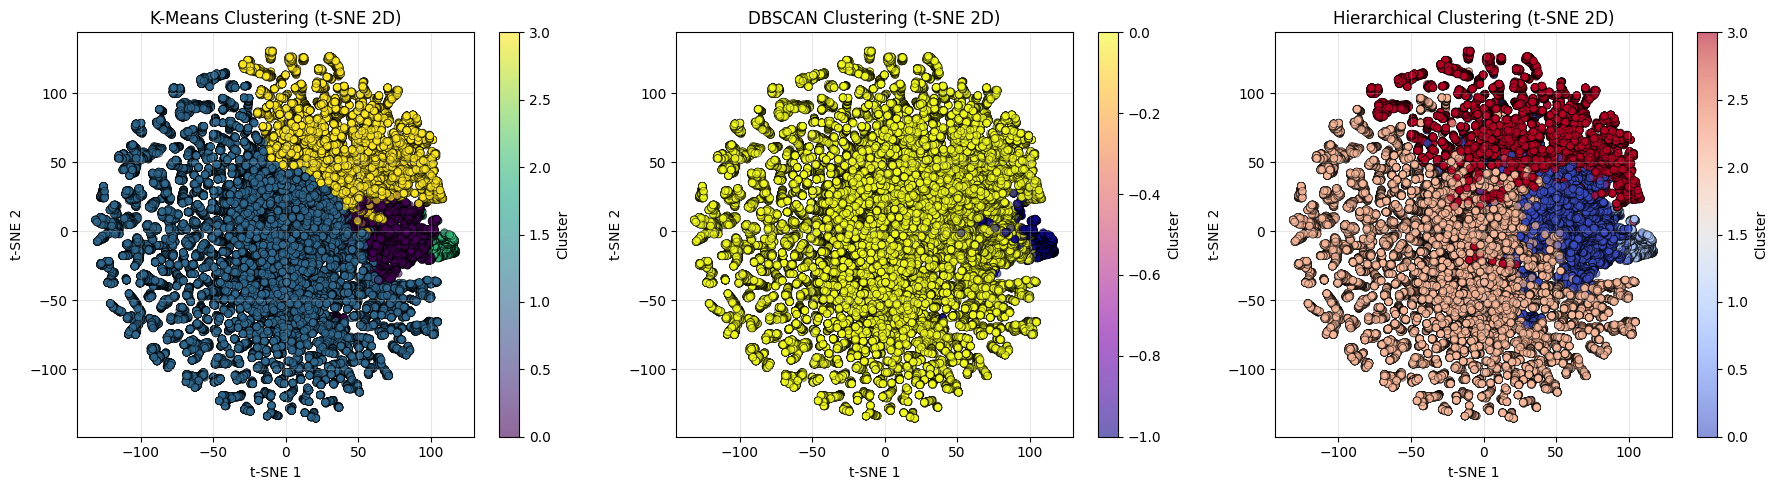

In [45]:
# t-SNE visualization (Warning: this can be slow on large datasets)
from sklearn.manifold import TSNE

print("Computing t-SNE... (this may take a minute)")
print(f"Dataset shape: {X_scaled.shape}")

# Dynamically determine PCA components (must be less than n_features)
n_features = X_scaled.shape[1]
n_pca_components = min(n_features - 1, 15)  # Use max 15 or fewer if not enough features

print(f"Using {n_pca_components} PCA components for pre-reduction")

# Use PCA pre-reduction for speed (recommended for large datasets)
X_pca_reduced = PCA(n_components=n_pca_components).fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(X_pca_reduced)

print("t-SNE transformation completed!")

# Plot t-SNE results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
sc1 = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                       c=df_cluster_clean['KMeans_Cluster'], cmap='viridis', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')
axes[0].set_title('K-Means Clustering (t-SNE 2D)')
plt.colorbar(sc1, ax=axes[0], label='Cluster')
axes[0].grid(True, alpha=0.3)

# DBSCAN
sc2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                       c=dbscan_labels, cmap='plasma', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('DBSCAN Clustering (t-SNE 2D)')
plt.colorbar(sc2, ax=axes[1], label='Cluster')
axes[1].grid(True, alpha=0.3)

# Hierarchical
sc3 = axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                       c=df_cluster_clean['Hierarchical_Cluster'], cmap='coolwarm', 
                       alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[2].set_xlabel('t-SNE 1')
axes[2].set_ylabel('t-SNE 2')
axes[2].set_title('Hierarchical Clustering (t-SNE 2D)')
plt.colorbar(sc3, ax=axes[2], label='Cluster')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [46]:
# Detailed PCA feature importance analysis
print("=" * 80)
print("PCA FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Look at component loadings for first 2 PCs
n_features_to_show = 10
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)

print("\nTop features contributing to PC1 (2D):")
top_indices_pc1 = np.argsort(np.abs(loadings[:, 0]))[-n_features_to_show:]
for idx in top_indices_pc1[::-1]:
    print(f"  {df_cluster_1.columns[idx]:30} {loadings[idx, 0]:8.4f}")

print("\nTop features contributing to PC2 (2D):")
top_indices_pc2 = np.argsort(np.abs(loadings[:, 1]))[-n_features_to_show:]
for idx in top_indices_pc2[::-1]:
    print(f"  {df_cluster_1.columns[idx]:30} {loadings[idx, 1]:8.4f}")

# Calculate average distance between clusters in PCA space
print("\n" + "=" * 80)
print("CLUSTER SEPARATION ANALYSIS (PCA 2D)")
print("=" * 80)

kmeans_centers_pca = pca_2d.transform(kmeans.cluster_centers_)
avg_distances = []
for i in range(len(kmeans_centers_pca)):
    distances = []
    for j in range(len(kmeans_centers_pca)):
        if i != j:
            dist = np.linalg.norm(kmeans_centers_pca[i] - kmeans_centers_pca[j])
            distances.append(dist)
    avg_distances.append(np.mean(distances))

print("\nAverage distance of each K-Means cluster center to others:")
for i, dist in enumerate(avg_distances):
    print(f"  Cluster {i}: {dist:.4f}")
print(f"\nMean separation: {np.mean(avg_distances):.4f}")
print(f"Std separation: {np.std(avg_distances):.4f}")

PCA FEATURE IMPORTANCE ANALYSIS

Top features contributing to PC1 (2D):
  Shipping Cost                    2.4443
  Sales                            2.0313
  Quantity                         1.0698
  Unit_Price                       0.7172
  Profit                           0.4561
  Category_Office Supplies        -0.1530
  Category_Technology              0.0880
  Order Priority                   0.0698
  Ship Mode_Standard Class        -0.0373
  Discount                        -0.0245

Top features contributing to PC2 (2D):
  Quantity                         2.0109
  Shipping Cost                   -0.4877
  Unit_Price                      -0.4069
  Sales                           -0.2888
  Profit                          -0.1297
  Category_Office Supplies         0.0815
  Category_Technology             -0.0513
  Order Priority                  -0.0426
  Is_North_America                 0.0289
  Ship Mode_Standard Class         0.0250

CLUSTER SEPARATION ANALYSIS (PCA 2D)

Average d

PC1 -> Shipping Cost i Sales su preko 2, to govori ako je porudzbina veca, veci su i troskovi isporuke.
PC2 -> Quantity ~2, a druge dve najvaznija feature-a su negativna, to govori da ako ima se razdvajavju porudzbine sa velikim brojem artikala a menje jedinicne cene od onih gde je mala kolicina ali sukplja isporuka

In [81]:
# Provera smislenosti klastera (velicina, silueta, separacija po feature-ima)
from sklearn.metrics import silhouette_samples
import numpy as np
import pandas as pd

key_cols = [
     'Quantity', 'Shipping Cost','Sales','Unit_Price', 'Profit', 'Category_Office Supplies',
     'Category_Technology'
 ]
existing_key_cols = [c for c in key_cols if c in df_cluster_clean.columns]
features_df = df_cluster_clean[existing_key_cols].copy()

if 'Unit_Price' not in features_df.columns and {'Sales', 'Quantity'}.issubset(df_cluster_clean.columns):
    features_df['Unit_Price'] = df_cluster_clean['Sales'] / df_cluster_clean['Quantity']

def evaluate_clusters(model_name: str, labels, X, feature_frame: pd.DataFrame):
    labels = pd.Series(labels, index=feature_frame.index, name='cluster')
    mask = labels != -1
    if model_name.upper() == 'DBSCAN' and mask.sum() == 0:
        print(f"\n{model_name}: samo noise tacke (-1).")
        return

    labels_eval = labels[mask]
    X_eval = X[mask]
    feature_eval = feature_frame.loc[mask]

    n_clusters = labels_eval.nunique()
    n_samples = len(labels_eval)
    min_size = max(50, int(0.01 * n_samples))

    print("\n" + "=" * 90)
    print(f"PROVERA KLASTERA: {model_name}")
    print("=" * 90)
    print(f"Broj klastera: {n_clusters}")
    print(f"Broj uzoraka: {n_samples}")

    sizes = labels_eval.value_counts().sort_index()
    print("\nVelicine klastera:")
    print(sizes.to_string())

    if n_clusters < 2:
        print("\nNema dovoljno klastera za siluetu.")
        return

    sil_samples = silhouette_samples(X_eval, labels_eval)
    sil_df = pd.DataFrame({'cluster': labels_eval, 'silhouette': sil_samples})
    sil_by_cluster = sil_df.groupby('cluster')['silhouette'].mean().sort_index()
    print("\nSilueta (prosek po klasteru):")
    print(sil_by_cluster.round(3).to_string())
    print(f"Ukupna silueta: {sil_samples.mean():.3f}")

    small_clusters = sizes[sizes < min_size]
    if len(small_clusters) > 0:
        print(f"\nUpozorenje: mali klasteri (manje od {min_size} uzoraka):")
        print(small_clusters.to_string())

    weak_clusters = sil_by_cluster[sil_by_cluster < 0.05]
    if len(weak_clusters) > 0:
        print("\nUpozorenje: klasteri sa slabom separacijom (silueta < 0.05):")
        print(weak_clusters.round(3).to_string())

    # Separacija po feature-ima (z-score od globalnog proseka)
    overall_mean = feature_eval.mean()
    overall_std = feature_eval.std().replace(0, np.nan)
    cluster_means = feature_eval.groupby(labels_eval).mean()
    z_scores = (cluster_means - overall_mean) / overall_std
    z_scores = z_scores.fillna(0.0)

    print("\nTop 3 odvajajuce feature vrednosti po klasteru (z-score):")
    for cluster_id, row in z_scores.iterrows():
        top = row.abs().sort_values(ascending=False).head(3).index.tolist()
        top_str = ", ".join([f"{c}: {row[c]:+.2f}" for c in top])
        print(f"  Klaster {cluster_id}: {top_str}")

if 'KMeans_Cluster' in df_cluster_clean.columns:
    evaluate_clusters('KMeans', df_cluster_clean['KMeans_Cluster'], X_scaled, features_df)

if 'DBSCAN_Cluster' in df_cluster_clean.columns:
    evaluate_clusters('DBSCAN', df_cluster_clean['DBSCAN_Cluster'], X_scaled, features_df)

if 'Hierarchical_Cluster' in df_cluster_clean.columns:
    evaluate_clusters('Hierarchical', df_cluster_clean['Hierarchical_Cluster'], X_scaled, features_df)


PROVERA KLASTERA: KMeans
Broj klastera: 4
Broj uzoraka: 51290

Velicine klastera:
cluster
0     4414
1    35253
2      698
3    10925

Silueta (prosek po klasteru):
cluster
0    0.142
1    0.446
2    0.145
3    0.290
Ukupna silueta: 0.382

Top 3 odvajajuce feature vrednosti po klasteru (z-score):
  Klaster 0: Unit_Price: +1.69, Sales: +1.65, Shipping Cost: +1.53
  Klaster 1: Quantity: -0.51, Sales: -0.28, Shipping Cost: -0.27
  Klaster 2: Shipping Cost: +6.07, Sales: +5.19, Unit_Price: +3.52
  Klaster 3: Quantity: +1.36, Unit_Price: -0.36, Category_Office Supplies: +0.19

PROVERA KLASTERA: DBSCAN
Broj klastera: 1
Broj uzoraka: 50342

Velicine klastera:
cluster
0    50342

Nema dovoljno klastera za siluetu.

PROVERA KLASTERA: Hierarchical
Broj klastera: 4
Broj uzoraka: 51290

Velicine klastera:
cluster
0     7679
1      907
2    31111
3    11593

Silueta (prosek po klasteru):
cluster
0    0.001
1    0.144
2    0.420
3    0.244
Ukupna silueta: 0.312

Upozorenje: klasteri sa slabom separ

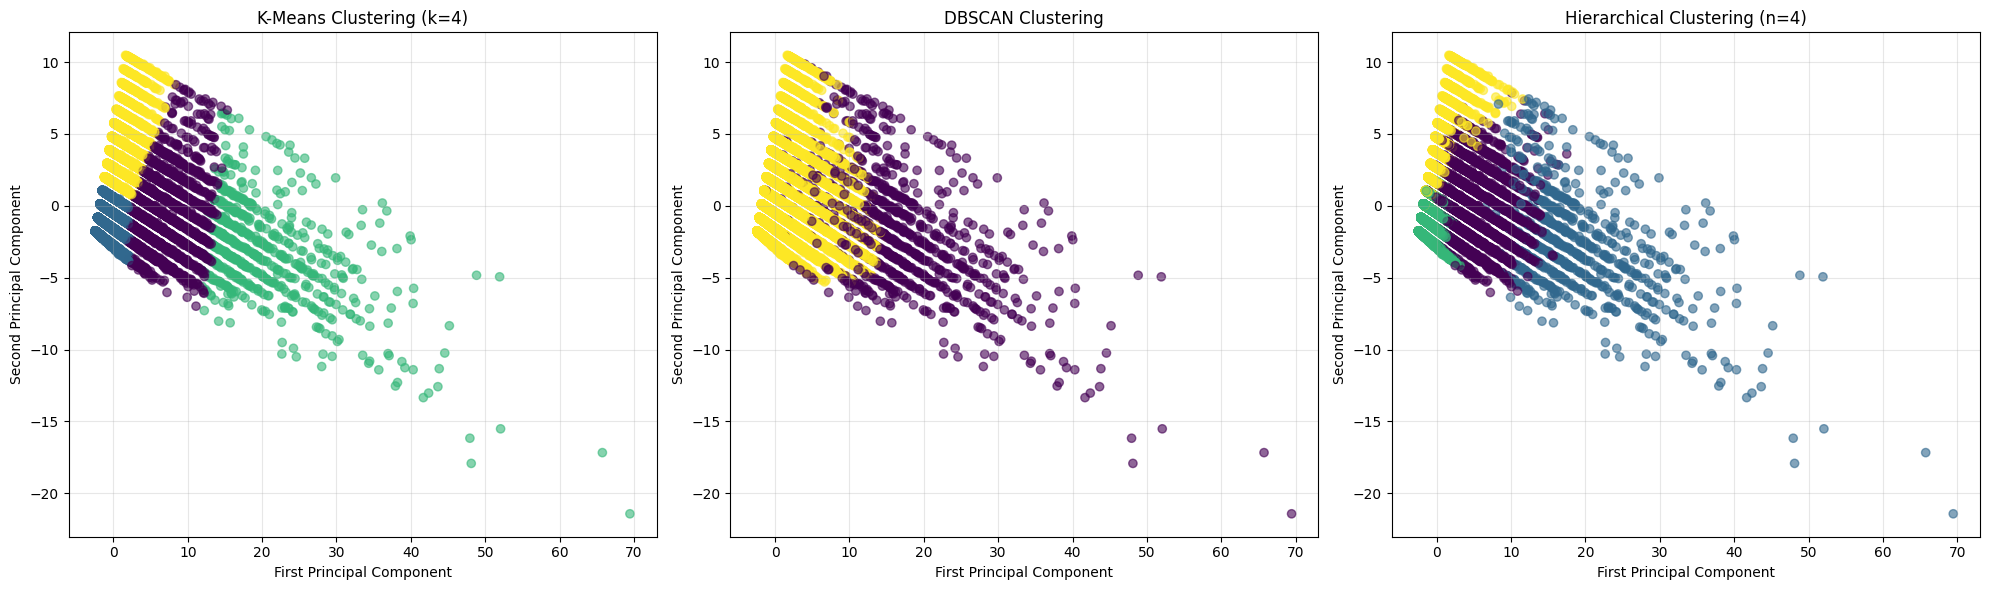


PCA explained variance ratio: [0.61947243 0.23525329 0.07896856]
Total variance explained: 93.37%


In [83]:
# Visualize clusters with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(features_df)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['KMeans_Cluster'], cmap='viridis', alpha=0.6)
axes[0].set_title(f'K-Means Clustering (k={optimal_k})')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['Hierarchical_Cluster'], cmap='viridis', alpha=0.6)
axes[2].set_title(f'Hierarchical Clustering (n={n_clusters})')
axes[2].set_xlabel('First Principal Component')
axes[2].set_ylabel('Second Principal Component')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

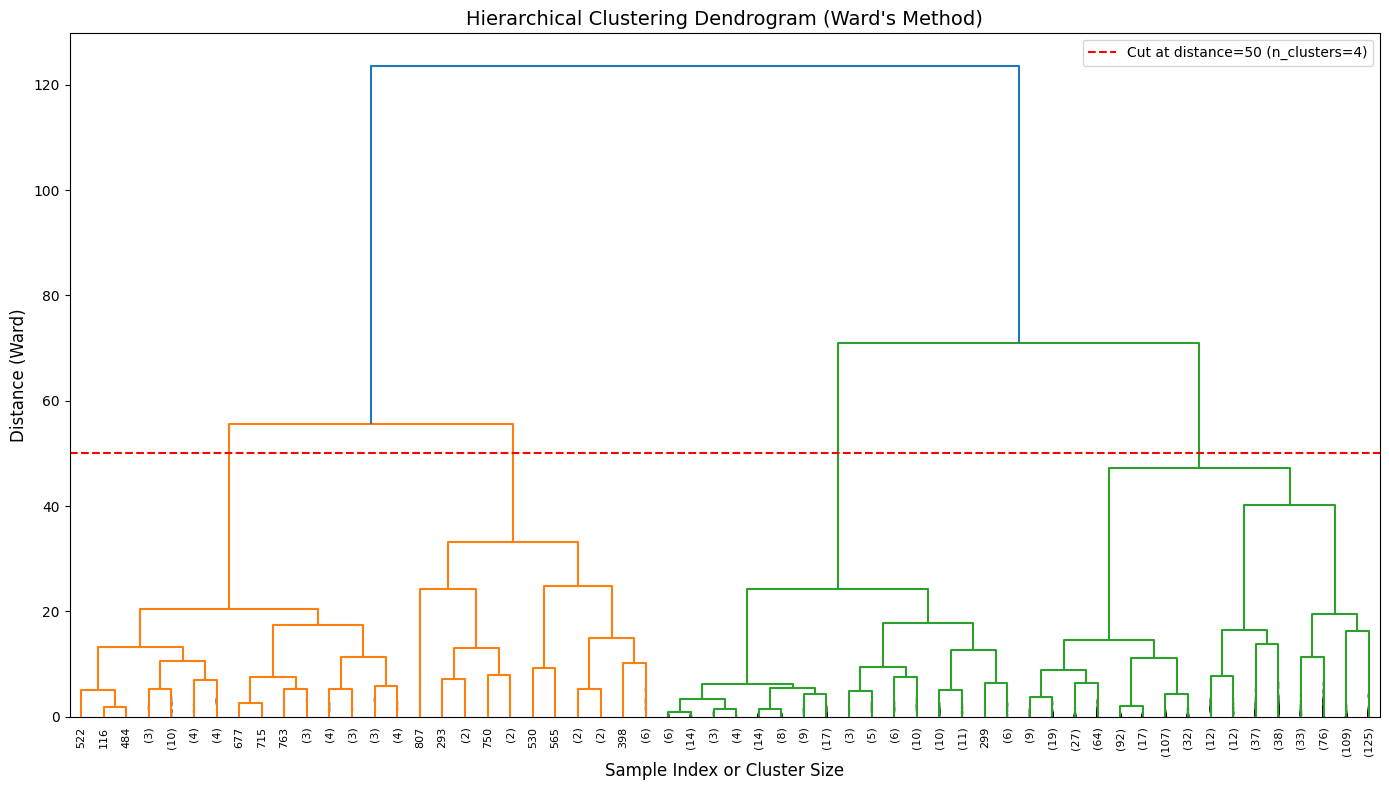


Dendrogram based on 1000 samples
Red dashed line indicates approximate cut point for the chosen number of clusters


In [82]:
# Dendrogram for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Use a sample for better visualization (full dataset would be too dense)
np.random.seed(42)
sample_size = min(1000, len(features_df))
sample_indices = np.random.choice(len(features_df), sample_size, replace=False)
X_sample = features_df.iloc[sample_indices]

# Create linkage matrix using Ward's method
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=5,  # Show only last 5 levels
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True
)
plt.title('Hierarchical Clustering Dendrogram (Ward\'s Method)', fontsize=14)
plt.xlabel('Sample Index or Cluster Size', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.axhline(y=50, color='r', linestyle='--', label=f'Cut at distance=50 (n_clusters={n_clusters})')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nDendrogram based on {sample_size} samples")
print("Red dashed line indicates approximate cut point for the chosen number of clusters")

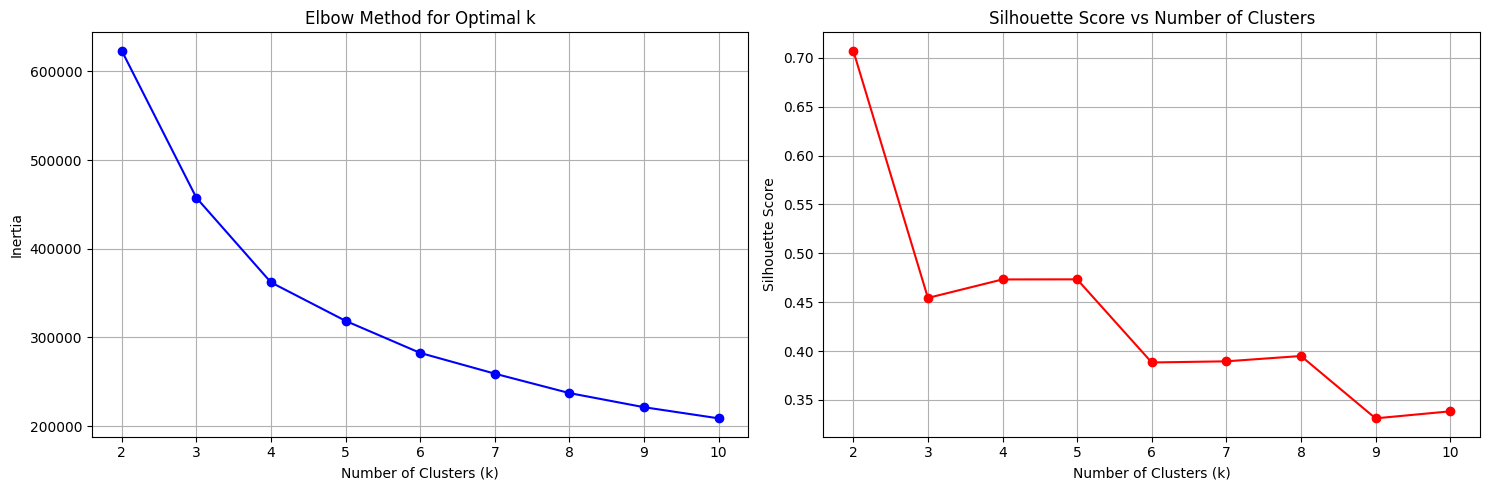

In [84]:
# K-Means: Find optimal k using elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0)
    kmeans.fit(features_df)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(features_df, kmeans.labels_)
    silhouette_scores.append(score)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

#  Vizualizacija rezultata

In [85]:
key_cols

['Quantity',
 'Shipping Cost',
 'Sales',
 'Unit_Price',
 'Profit',
 'Category_Office Supplies',
 'Category_Technology']

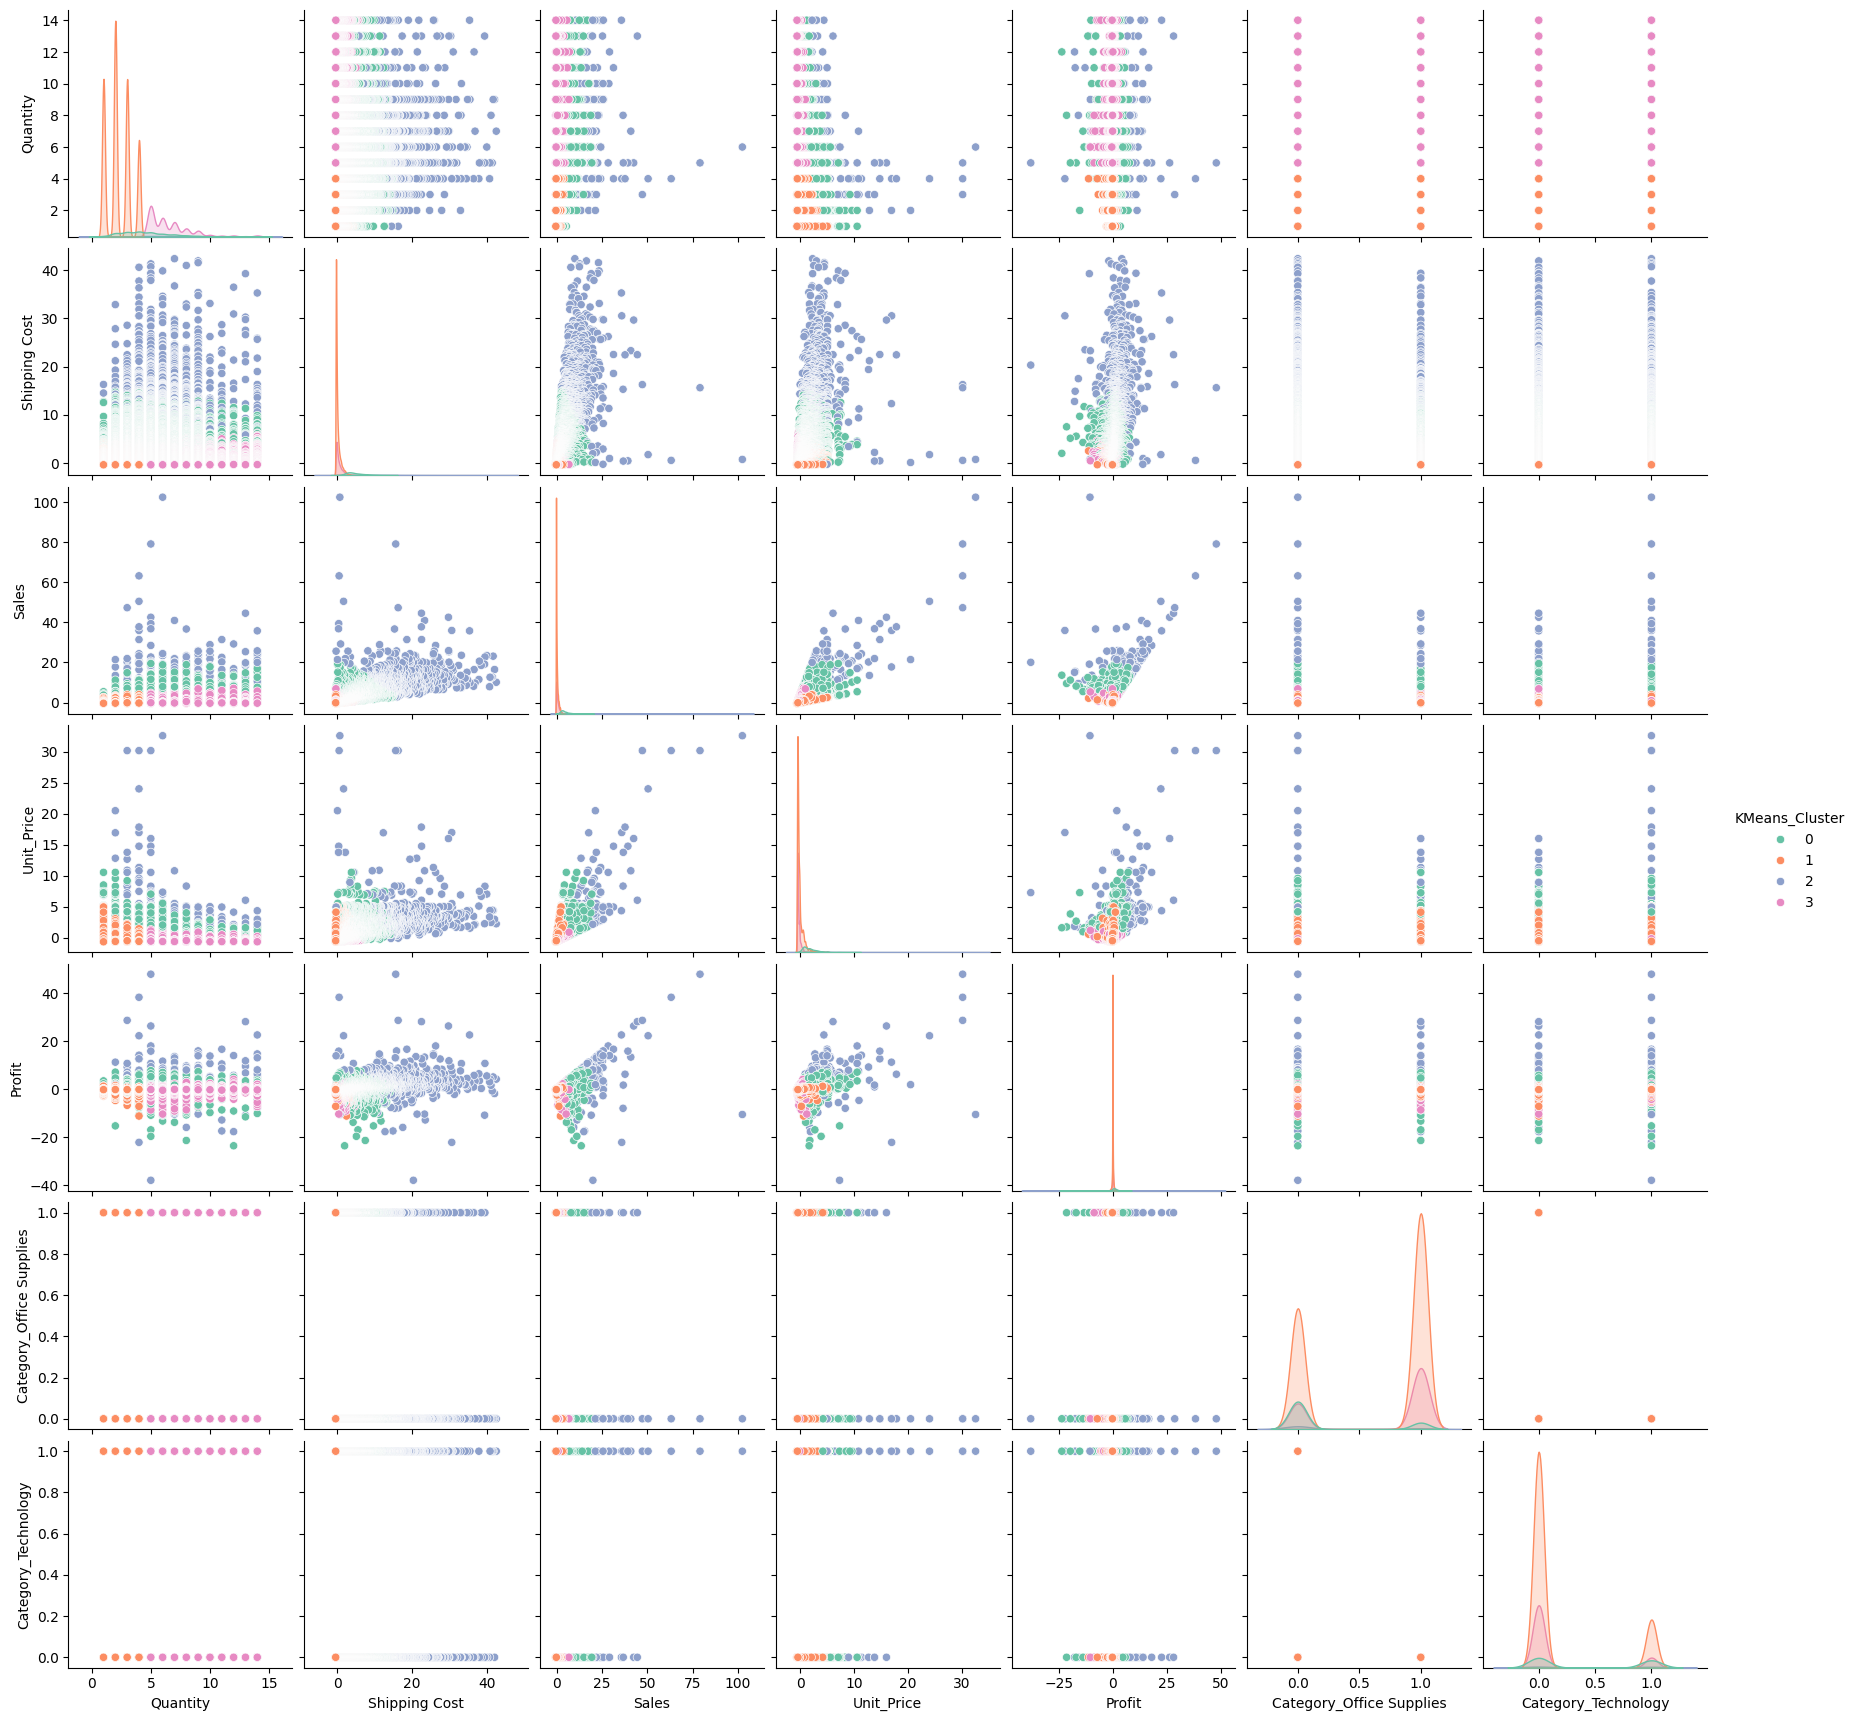

In [89]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

important_features = key_cols.copy()
df_for_plot = df_cluster_clean[important_features + ['KMeans_Cluster']].copy()
sns.pairplot(df_for_plot, hue='KMeans_Cluster', palette='Set2')
plt.show()

Klastera 2 -> visoka prodaja ne garantuje uvek i maksimalan profit zbog varijacija u troškovima isporuke i popustima.

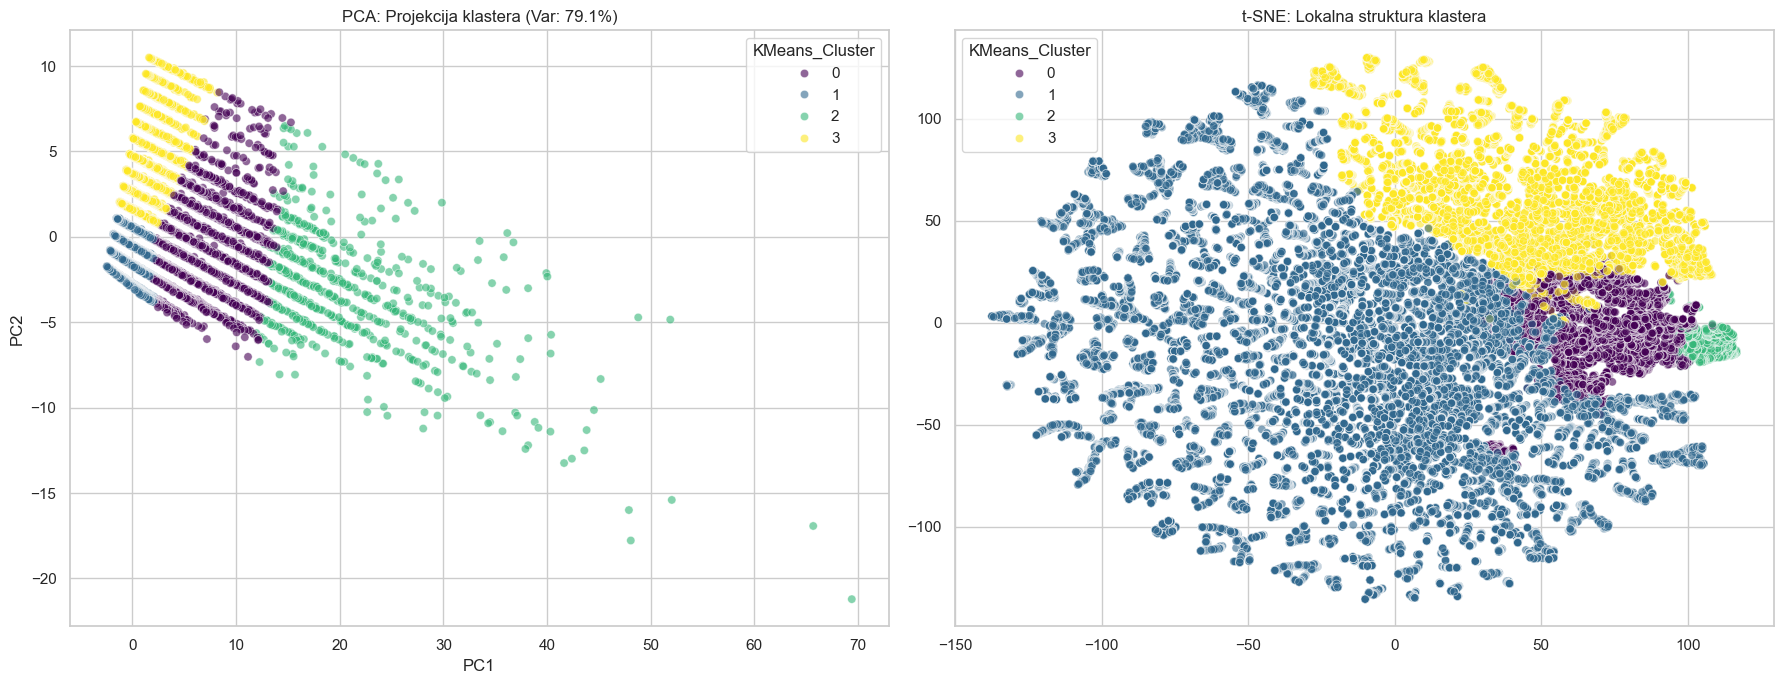

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Postavljanje stila
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. PCA Vizuelizacija
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled) # X_scaled su tvoji skalirani podaci

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster_clean['KMeans_Cluster'], 
                palette='viridis', alpha=0.6, ax=axes[0], edgecolor='w')
axes[0].set_title(f'PCA: Projekcija klastera (Var: {sum(pca_2d.explained_variance_ratio_)*100:.1f}%)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# 2. t-SNE Vizuelizacija (može potrajati par minuta zbog 50k+ redova)
# Koristimo manji uzorak ako je previše sporo: df_cluster_clean.sample(10000)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_cluster_clean['KMeans_Cluster'], 
                palette='viridis', alpha=0.6, ax=axes[1], edgecolor='w')
axes[1].set_title('t-SNE: Lokalna struktura klastera')

plt.tight_layout()
plt.show()

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Srednje vrednosti najvažnijih feature-a po klasterima
cluster_means = df_cluster_clean.groupby('KMeans_Cluster')[key_cols].mean()
print("--- Srednje vrednosti po klasterima ---")
print(cluster_means)

# 2. Proširena statistika (min, max, median, std) za Profit
cluster_stats = df_cluster_clean.groupby('KMeans_Cluster')['Profit'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\n--- Detaljna statistika Profita po klasterima ---")
print(cluster_stats)

--- Srednje vrednosti po klasterima ---
                Quantity  Shipping Cost      Sales  Unit_Price    Profit  \
KMeans_Cluster                                                             
0               4.640462       4.864321   4.376156    1.689578  0.632891   
1               2.307463       0.141908   0.113075   -0.170694 -0.114195   
2               6.598854      16.765991  12.226725    3.522097  2.982970   
3               6.579222       0.500825   0.526297   -0.356865 -0.077801   

                Category_Office Supplies  Category_Technology  
KMeans_Cluster                                                 
0                               0.190077             0.427277  
1                               0.641109             0.182339  
2                               0.206304             0.455587  
3                               0.703799             0.138124  

--- Detaljna statistika Profita po klasterima ---
                    mean    median       std        min        max
K

Klaster 0 => Maloprodaja sa vecom cenom (skuplji projzovdi) - retka kupovina
Klaster 1 => Standarni mali kupci - Pretezno kupuju kancelarsku opremu po niskoj ceni, ali  cesto nisu  transkcije profitabilne
Klaster 2 => Premium kupci - Radi se o profitabinolnoj trgovini, sa vecim troskovima transporta
Klaster 3 => Veleprodaja kancelarske opreme - Prodaju se velike kolicine paketa ali je mali profit.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

def cluster_cross_validation(X, n_clusters=4, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    print(f"--- Cross-Validation (K-Fold, n={n_splits}) ---")
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        
        # Treniramo model na trening setu
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        model.fit(X_train)
        
        # Evaluacija na test setu (podaci koje model nije video)
        test_labels = model.predict(X_test)
        score = silhouette_score(X_test, test_labels)
        scores.append(score)
        
        print(f"Fold {fold+1}: Silhouette Score = {score:.4f}")
        
    print(f"\nMean CV Silhouette Score: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    return scores

cv_scores = cluster_cross_validation(X_scaled, n_clusters=4)

--- Cross-Validation (K-Fold, n=5) ---
Fold 1: Silhouette Score = 0.3769
Fold 2: Silhouette Score = 0.3851
Fold 3: Silhouette Score = 0.3835
Fold 4: Silhouette Score = 0.3849
Fold 5: Silhouette Score = 0.3813

Mean CV Silhouette Score: 0.3823 (+/- 0.0031)


In [94]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def check_clustering_stability(X, n_clusters=4, iterations=50):
    results = []
    # Prvo pokretanje kao referentna tačka
    base_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    base_labels = base_model.fit_predict(X)
    
    print(f"--- Stability Analysis (k={n_clusters}) ---")
    for i in range(iterations):
        random_seed = np.random.randint(1, 1000)
        current_model = KMeans(n_clusters=n_clusters, random_state=random_seed, n_init=10)
        current_labels = current_model.fit_predict(X)
        
        # ARI meri sličnost između dva grupisanja (1.0 je identično)
        ari_score = adjusted_rand_score(base_labels, current_labels)
        results.append(ari_score)
        print(f"Iteration {i+1} (seed {random_seed}): ARI = {ari_score:.4f}")
    
    print(f"\nAverage Stability Score: {np.mean(results):.4f}")
    return results

# Pokreni na svojim podacima
stability_results = check_clustering_stability(X_scaled, n_clusters=4)

--- Stability Analysis (k=4) ---
Iteration 1 (seed 883): ARI = 1.0000
Iteration 2 (seed 364): ARI = 0.9998
Iteration 3 (seed 924): ARI = 1.0000
Iteration 4 (seed 950): ARI = 1.0000
Iteration 5 (seed 258): ARI = 1.0000
Iteration 6 (seed 977): ARI = 1.0000
Iteration 7 (seed 511): ARI = 1.0000
Iteration 8 (seed 231): ARI = 1.0000
Iteration 9 (seed 14): ARI = 1.0000
Iteration 10 (seed 14): ARI = 1.0000
Iteration 11 (seed 556): ARI = 1.0000
Iteration 12 (seed 210): ARI = 1.0000
Iteration 13 (seed 40): ARI = 1.0000
Iteration 14 (seed 34): ARI = 1.0000
Iteration 15 (seed 747): ARI = 1.0000
Iteration 16 (seed 833): ARI = 0.9998
Iteration 17 (seed 234): ARI = 1.0000
Iteration 18 (seed 786): ARI = 1.0000
Iteration 19 (seed 880): ARI = 1.0000
Iteration 20 (seed 290): ARI = 1.0000
Iteration 21 (seed 855): ARI = 1.0000
Iteration 22 (seed 433): ARI = 1.0000
Iteration 23 (seed 848): ARI = 1.0000
Iteration 24 (seed 979): ARI = 1.0000
Iteration 25 (seed 741): ARI = 1.0000
Iteration 26 (seed 892): ARI =

In [ ]:

#relpath = '..\\data\\Global_Superstore2.csv'
#abspath = os.path.abspath(relpath)
#
#df_original = pd.read_csv(abspath, header=0, encoding = "ISO-8859-1")
#
#df_original['KMeans_Cluster'] = df_cluster_clean['KMeans_Cluster']
#df_original['Cluster_Name'] = df_cluster_clean['Cluster_Name']
#
## Eksport u CSV
#df_original.to_csv('final_p2.csv', index=False)
#print("Rezultati su sačuvani u 'final_p2.csv'")

In [ ]:
#import pickle
#
## Čuvanje modela
#with open('kmeans_model.pkl', 'wb') as f:
#    pickle.dump(kmeans_model, f)
#
## Čuvanje scaler-a (obavezno!)
#with open('scaler.pkl', 'wb') as f:
#    pickle.dump(scaler, f)
#
#print("Model i Scaler su uspešno sačuvani.")

In [ ]:
#def predict_cluster(new_data):
#    """
#    new_data: DataFrame sa istim kolonama kao original pre obrade
#    """
#    # 1. Učitavanje modela i scalera
#    with open('kmeans_model.pkl', 'rb') as f:
#        loaded_model = pickle.load(f)
#    with open('scaler.pkl', 'rb') as f:
#        loaded_scaler = pickle.load(f)
#        
#    # 2. Mapiranje naziva (koristi istu logiku kao u profilisanju)
#    names = {
#        0: "Standardne operacije",
#        1: "Mali kupci",
#        2: "VIP / Premium klijenti",
#        3: "Masovne porudžbine"
#    }
#    
#    # 3. Predobrada (skaliranje i selekcija kolona)
#    # Napomena: Ovde bi trebao dodati isti preprocessing kod koji si koristio (one-hot, itd.)
#    scaled_data = loaded_scaler.transform(new_data)
#    
#    # 4. Predviđanje
#    cluster_idx = loaded_model.predict(scaled_data)[0]
#    
#    return {
#        'cluster_id': cluster_idx,
#        'cluster_name': names.get(cluster_idx, "Unknown")
#    }
#
# Primer testiranja:
# test_order = df_cluster_1.iloc[[0]] # Uzimamo prvi red kao primer
# print(predict_cluster(test_order))